## **1. Business Problem Understanding**

### **Context**

The California housing market is a complex and dynamic sector influenced by a multitude of factors such as location, socioeconomic conditions, and environmental aspects. The dataset under analysis provides information on housing prices, along with other features like the number of rooms, population, income levels, and geographical data (latitude and longitude). Predicting housing prices based on these factors is critical for understanding market trends and supporting stakeholders such as real estate agents, policymakers, and potential homeowners.

### **Problem Statement**

Housing affordability and price predictability are pressing challenges for both home sellers and buyers in California. Home sellers often struggle to determine the optimal listing price for their properties. The challenge is to help sellers set competitive prices that not only reflect current market demand but also consider the unique features of their properties.

On the other hand, homebuyers face difficulties in making informed purchasing decisions. They need reliable guidance to assess whether a listed price aligns with market value and the property’s characteristics. Addressing these issues requires a robust pricing model capable of accurately predicting housing prices. Such a model would empower sellers to set fair and attractive prices while enabling buyers to evaluate the reasonableness of listings, fostering more confident and well-informed decisions in today’s dynamic housing market.

### **Objectives**

The primary objective of this project is to develop a robust and accurate housing price prediction model using the California housing price dataset. The project will explore the features that have the most significant impact on price predictions and identify the best-performing machine learning algorithm. By achieving these goals, the project aims to bridge the gap between sellers’ pricing strategies and buyers’ decision-making processes, fostering a more transparent and informed housing market.

### **Analytic Approach**

We will begin by exploring the dataset to identify patterns and relationships among the available features. Next, we will employ seven supervised machine learning models for prediction: **Linear Regression**, **KNN Regressor**, **Decision Tree**, **Random Forest**, **XGBoost**, **Lasso Regression**, and **Support Vector Regression (SVR)**. These models will be evaluated using multiple performance metrics to ensure robust comparisons. The best-performing model will be selected based on its ability to balance predictive accuracy and error minimization. This solution aims to provide stakeholders with a reliable tool for accurately predicting home prices in California. Both homebuyers and sellers can use this solution to make informed decisions when determining the selling or buying price of a property in California.

### **Metrics Evaluation**

For this project, we will evaluate model performance using four key metrics: **Root Mean Squared Error (RMSE)**, **R-Squared (R²)**, **Mean Absolute Percentage Error (MAPE)**, and **Mean Absolute Error (MAE)**. RMSE and MAE will provide insights into the absolute prediction errors, with RMSE being more sensitive to large deviations. R² will measure how well the model explains the variability in housing prices, while MAPE will assess the prediction accuracy in percentage terms, offering a scale-independent evaluation. These metrics together will ensure a comprehensive assessment of the model’s accuracy and reliability.

## **2. Data Understanding**

The dataset provides information on houses located in various districts of California, based on the 1990 census data. It includes both housing characteristics and summary statistics for the districts. Key features of the dataset encompass variables such as median income, house age, average number of rooms and bedrooms, population, households, and geographical data (latitude and longitude). The target variable is the median house value for each district. This data offers a comprehensive snapshot of housing conditions and demographics in California at that time, serving as the foundation for building predictive models.

Data source: https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| longitude | Float | A measure of how far west a house is; a higher value is farther west |
| latitude | Float | A measure of how far north a house is; a higher value is farther north |
| housing_median_age | Float | Median age of a house within a block; a lower number is a newer building |
| total_rooms | Float | Total number of rooms within a block |
| total_bedrooms | Float | Total number of bedrooms within a block |
| population | Float | Total number of people residing within a block |
| households | Float | Total number of households, a group of people residing within a home unit, for a block |
| median_income | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| median_house_value | Float | Median house value for households within a block (measured in US Dollars) |
| ocean_proximity | Text | Location of the house w.r.t ocean/sea |

### **Load Required Libraries**

In [ ]:
# General
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import folium
from folium import Choropleth
from folium.features import GeoJsonTooltip

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split Data and Hyperparameter Tunning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# Model Selection
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

# Model Evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import shap

# Save Model
import joblib

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

### **Load Dataset**

In [109]:
df = pd.read_csv("data_california_house.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

### **Data Overview**

In [110]:
# Fetching the number of rows & columns of the data set
print(f'Number of rows and columns in the df is {df.shape}')

Number of rows and columns in the df is (14448, 10)


In [111]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Based on the information above, we can observe the following:
* The dataset contains 14,448 entries (rows) and 10 attributes (variables or columns). The unnecessary variables will be discarded during data cleaning.
* Several variables have missing values, which will be addressed during the data cleaning process.

Add here!

### **Extract New Feature**

In [112]:
# Convert latitude and longitude to a geometry column
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')  # Ensure CRS is WGS84

# Load the county shapefile
county_shapefile = gpd.read_file('california_state.shp')

# Ensure both datasets have the same CRS
county_shapefile = county_shapefile.to_crs(geo_df.crs)

# Spatial join to map points to county boundaries
result = gpd.sjoin(geo_df, county_shapefile, how='left', predicate='within')

#Extract county names into the original dataframe
df['county'] = result['NAME'] 

In [7]:
df['county'].nunique()

58

### **Remove Irrelevant Columns From Data Set**

In [8]:
df.drop(['geometry'], axis=1, inplace=True)

## **3. Data Cleaning**

Data cleaning aims to prepare the dataset for analysis by ensuring it is accurate, consistent, and complete, with an emphasis on addressing issues such as missing values, duplicates, outliers, and inconsistencies.

#### **Convert the Data Type**

In [9]:
# Set as categorical data
df.ocean_proximity = df.ocean_proximity.astype('category')

Before starting the data cleaning process, the `ocean_proximity` variable will be converted to the “category” type. Converting string variables (object) to categorical types helps reduce memory usage.

### **Check Duplicate Entries**

In [10]:
df.duplicated().sum()

0

There is no duplicated rows in this dataset.

### **Check Missing Values**

In [11]:
# Variables sorted by the number and percentage of missing values in each column
df.isna().sum().sort_values(ascending=False), (df.isna().sum()/df.shape[0]*100).round(2).sort_values(ascending=False)

(total_bedrooms        137
 county                  2
 longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 population              0
 households              0
 median_income           0
 ocean_proximity         0
 median_house_value      0
 dtype: int64,
 total_bedrooms        0.95
 county                0.01
 longitude             0.00
 latitude              0.00
 housing_median_age    0.00
 total_rooms           0.00
 population            0.00
 households            0.00
 median_income         0.00
 ocean_proximity       0.00
 median_house_value    0.00
 dtype: float64)

There are two missing values in the `county` variable corresponding to properties located on the island. To maintain data consistency and ensure no rows are excluded, while also identifying these unique cases for further analysis, the missing values will be assigned the label ‘Unknown’ under the county variable.”

In [12]:
df['county'].fillna('Unknown', inplace=True)

The `total_bedrooms` variable contains missing values, but they are insignificant as they account for less than 1% of the data. As a result, these missing values will be removed.

In [13]:
# Drop missing values in the total_bedrooms variable
df = df.dropna(subset=['total_bedrooms'])
df.shape

(14311, 11)

In [14]:
# Confirm the total number of missing values after filling
df[['total_bedrooms', 'county']].isna().sum()

total_bedrooms    0
county            0
dtype: int64

It is confimed that the `total_bedrooms` no longer has missing values.

### **Check Anomalies Data**

In [15]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique','sample unique'],
                     data=listItem)

dataFeatures  dataType  null  unique              sample unique
0            longitude   float64     0     806         [-116.38, -118.32]
1             latitude   float64     0     835             [34.66, 37.77]
2   housing_median_age   float64     0      52               [11.0, 46.0]
3          total_rooms   float64     0    5213           [2786.0, 4675.0]
4       total_bedrooms   float64     0    1748           [1263.0, 1089.0]
5           population   float64     0    3491           [1598.0, 1075.0]
6           households   float64     0    1646            [1068.0, 184.0]
7        median_income   float64     0    9726           [5.2557, 3.9566]
8      ocean_proximity  category     0       5     [NEAR BAY, NEAR OCEAN]
9   median_house_value   float64     0    3540        [127000.0, 43100.0]
10              county    object     0      59  [San Joaquin, Stanislaus]

In [16]:
df['ocean_proximity'].unique()

['INLAND', 'NEAR BAY', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [90]:
unique_counties = df['county'].unique()
unique_counties

array(['Fresno', 'Alameda', 'Los Angeles', 'Orange', 'Sacramento',
       'Contra Costa', 'Santa Clara', 'Riverside', 'Imperial',
       'San Diego', 'Calaveras', 'San Bernardino', 'El Dorado', 'Yolo',
       'San Joaquin', 'Tulare', 'Napa', 'Kern', 'Ventura', 'San Mateo',
       'San Francisco', 'Madera', 'Merced', 'Sutter', 'Santa Barbara',
       'Humboldt', 'Monterey', 'Sonoma', 'Santa Cruz', 'Nevada',
       'Stanislaus', 'Tehama', 'Marin', 'Butte', 'San Luis Obispo',
       'Mendocino', 'Solano', 'Placer', 'Shasta', 'Unknown', 'Glenn',
       'Siskiyou', 'Mono', 'Kings', 'Yuba', 'Colusa', 'San Benito',
       'Lake', 'Amador', 'Tuolumne', 'Del Norte', 'Inyo', 'Modoc',
       'Trinity', 'Lassen', 'Plumas', 'Alpine', 'Mariposa', 'Sierra'],
      dtype=object)

In [88]:
df['county'].unique()

array(['Fresno', 'Alameda', 'Los Angeles', 'Orange', 'Sacramento',
       'Contra Costa', 'Santa Clara', 'Riverside', 'Imperial',
       'San Diego', 'Calaveras', 'San Bernardino', 'El Dorado', 'Yolo',
       'San Joaquin', 'Tulare', 'Napa', 'Kern', 'Ventura', 'San Mateo',
       'San Francisco', 'Madera', 'Merced', 'Sutter', 'Santa Barbara',
       'Humboldt', 'Monterey', 'Sonoma', 'Santa Cruz', 'Nevada',
       'Stanislaus', 'Tehama', 'Marin', 'Butte', 'San Luis Obispo',
       'Mendocino', 'Solano', 'Placer', 'Shasta', 'Unknown', 'Glenn',
       'Siskiyou', 'Mono', 'Kings', 'Yuba', 'Colusa', 'San Benito',
       'Lake', 'Amador', 'Tuolumne', 'Del Norte', 'Inyo', 'Modoc',
       'Trinity', 'Lassen', 'Plumas', 'Alpine', 'Mariposa', 'Sierra'],
      dtype=object)

The ocean_proximity column indicates the distance of a property from the coastline, categorized into the following values:
- <1H OCEAN: Properties located within less than a 1-hour drive to the ocean.
- INLAND: Properties situated inland, far from the coastline.
- NEAR OCEAN: Properties located relatively close to the ocean but not within a 1-hour drive.
- NEAR BAY: Properties located relatively close to a bay.
- ISLAND: Properties situated on an island.

In [17]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6300
INLAND        4544
NEAR OCEAN    1855
NEAR BAY      1610
ISLAND           2
Name: count, dtype: int64

The “ISLAND” category in the ocean_proximity variable, despite having only two data points, was retained in the analysis. While its minimal representation poses challenges for meaningful statistical analysis, its inclusion ensures that the model reflects all possible property types in the dataset. This decision acknowledges the value of maintaining dataset integrity and capturing unique cases, even if they are rare, rather than potentially biasing the model by excluding an entire category.

In [18]:
df[df['ocean_proximity'] == 'ISLAND']

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8303     -118.33     33.34                52.0       2359.0           591.0   
12680    -118.48     33.43                29.0        716.0           214.0   

       population  households  median_income ocean_proximity  \
8303       1100.0       431.0         2.8333          ISLAND   
12680       422.0       173.0         2.6042          ISLAND   

       median_house_value       county  
8303             414700.0  Los Angeles  
12680            287500.0  Los Angeles

### **Check Outliers**

In [19]:
# List of numeric variables
numeric_vars = df.select_dtypes(include=['number'])

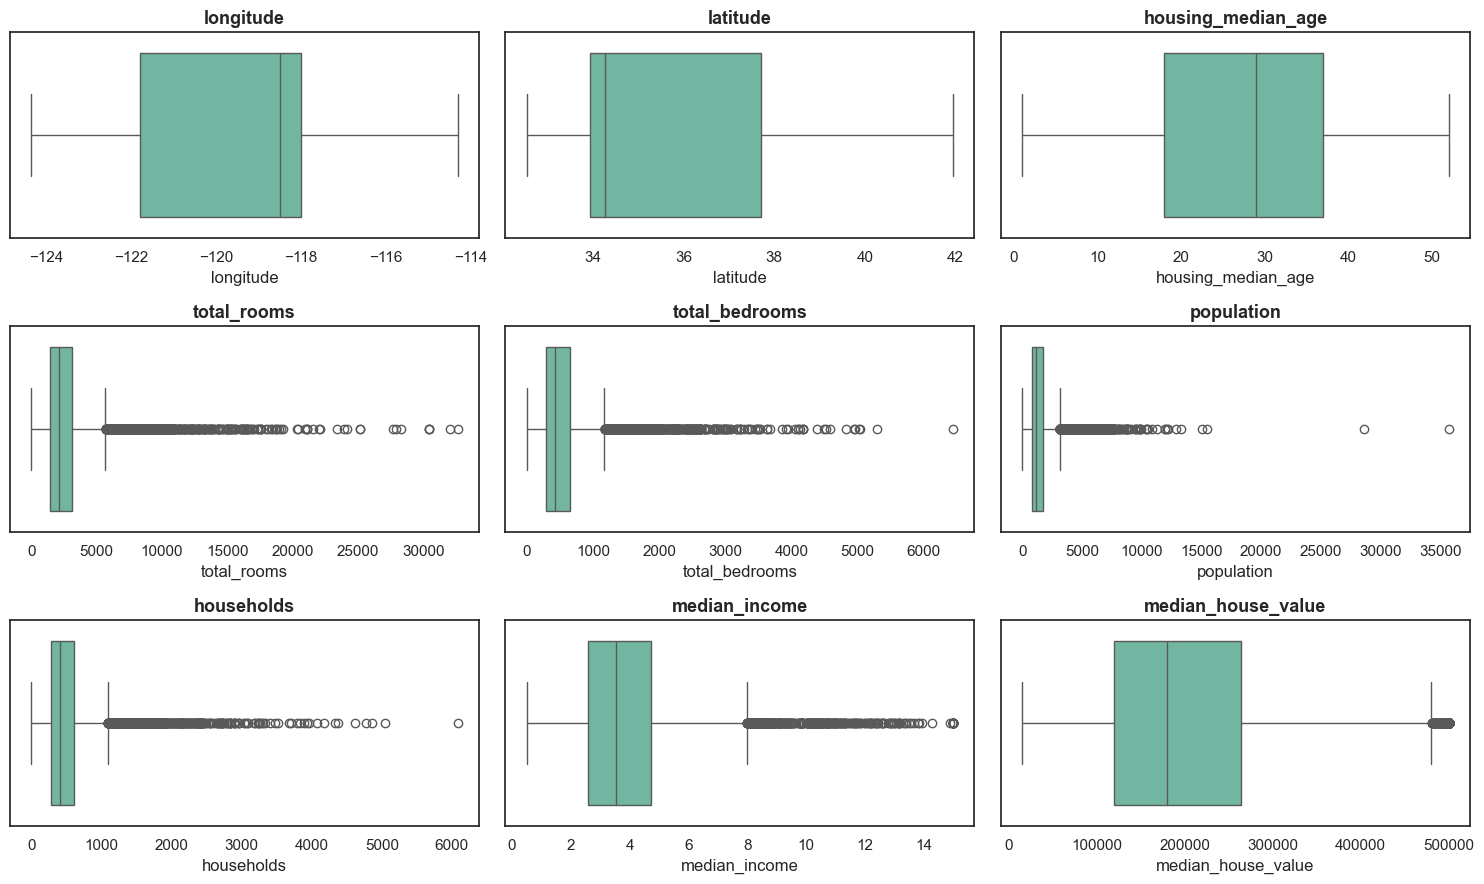

In [20]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='white', palette='Set2')
plotnumber = 1
    
for feature in numeric_vars:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=13, fontweight='bold')
    plt.tight_layout()
    plotnumber += 1

The boxplots above show that most variables have outliers, except for `longitude`, `latitude`, and `housing_median-age`. We will examine each variable with outliers in detail to determine the best approach for handling them.

In [21]:
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

In [22]:
for i in numeric_vars:
    print(i)
    outliers(df[i])
    print()

longitude
Upper fence:  -112.30000000000001
Lower fence:  -127.5

latitude
Upper fence:  43.39250000000001
Lower fence:  28.252499999999994

housing_median_age
Upper fence:  65.5
Lower fence:  -10.5

total_rooms
Upper fence:  5677.0
Lower fence:  -1083.0

total_bedrooms
Upper fence:  1175.0
Lower fence:  -233.0

population
Upper fence:  3129.0
Lower fence:  -623.0

households
Upper fence:  1090.25
Lower fence:  -207.75

median_income
Upper fence:  7.986150000000001
Lower fence:  -0.6806500000000009

median_house_value
Upper fence:  480275.0
Lower fence:  -97125.0



In [23]:
df2 = df.copy()
df2.shape

(14311, 11)

We duplicated the dataset to evaluate how much data would be removed if all outliers were excluded.

In [24]:
df2 = df2[(df2['total_rooms'] >= 0.5) & (df2['total_rooms'] <= 5677)]
print(df2.shape)

df2 = df2[(df2['total_bedrooms'] >= 0) & (df2['total_bedrooms'] <= 1175)]
print(df2.shape)

df2 = df2[(df2['population'] >= 0.5) & (df2['population'] <= 3129)]
print(df2.shape)

df2 = df2[(df2['households'] >= 0) & (df2['households'] <= 1090.25)]
print(df2.shape)

df2 = df2[(df2['median_income'] >= 0) & (df2['median_income'] <= 7.98615)]
print(df2.shape)

df2 = df2[(df2['median_house_value'] >= 0) & (df2['median_house_value'] <= 480275)]
print(df2.shape)

(13406, 11)
(13208, 11)
(13036, 11)
(13031, 11)
(12616, 11)
(12231, 11)


Based on the analysis above, removing all outliers would eliminate 2,080 values, accounting for approximately 15.53% of the total dataset—a substantial proportion. As a result, we will review each feature individually and decide whether we will remove all the outiers or only the extreme ones.

**median_house_value**

In [25]:
print(type(plt.xlabel)) 

<class 'function'>


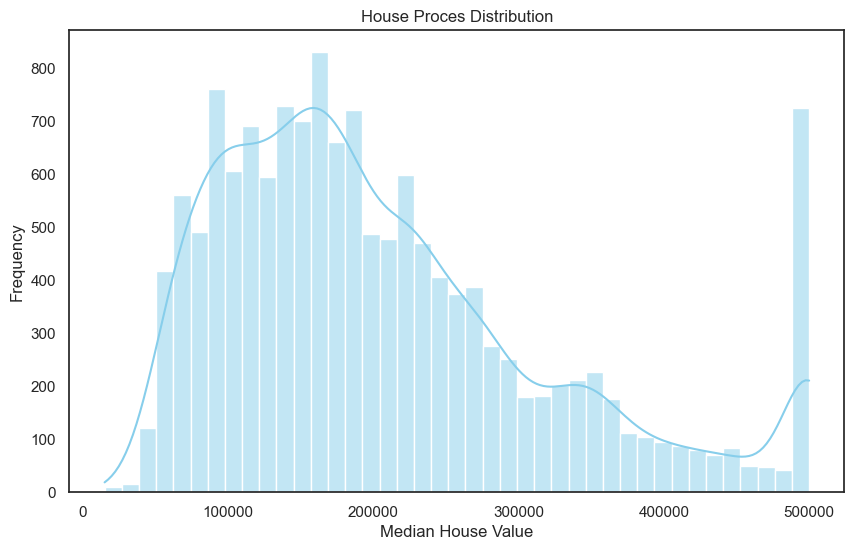

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='median_house_value', kde=True, color='skyblue')
plt.title('House Proces Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [27]:
df3 = df[df['median_house_value']>480275]
df3.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8      -117.65     33.48                 6.0       1638.0           188.0   
43     -122.21     37.37                34.0       1476.0           217.0   
106    -117.92     33.63                39.0       1469.0           226.0   
133    -122.44     37.80                52.0       3257.0           735.0   
158    -118.38     34.14                40.0       1965.0           354.0   

     population  households  median_income ocean_proximity  \
8         572.0       174.0        13.0502       <1H OCEAN   
43        613.0       223.0         8.2883      NEAR OCEAN   
106       553.0       225.0         7.8496       <1H OCEAN   
133      1045.0       620.0         4.5523        NEAR BAY   
158       666.0       357.0         6.0876       <1H OCEAN   

     median_house_value         county  
8              500001.0         Orange  
43             500001.0      San Mateo  
106            490800.0         Orange  
133            500001.0  San Francisco  
158            483800.0    Los Angeles

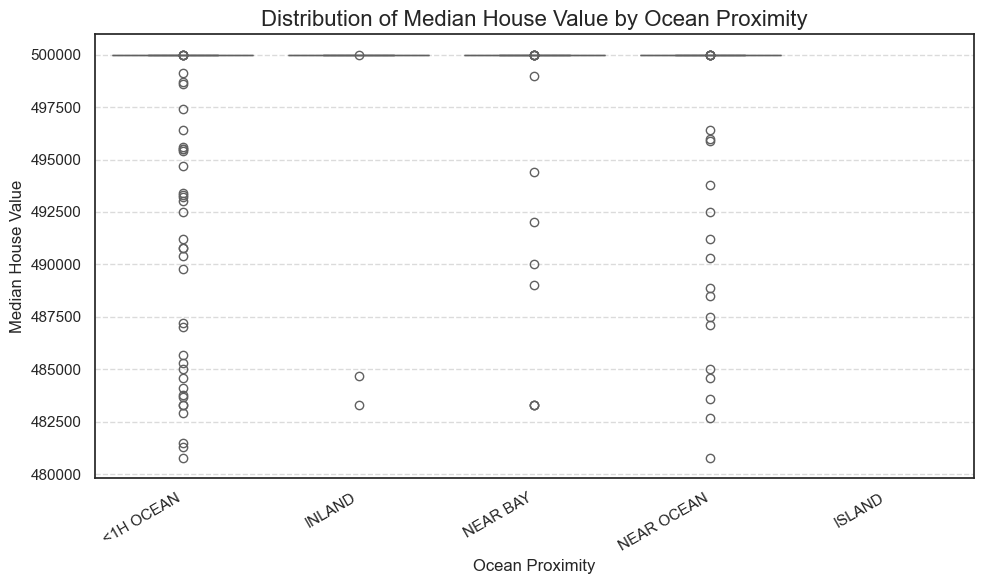

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='ocean_proximity', 
    y='median_house_value', 
    data=df3,
    order=df3.groupby('ocean_proximity')['median_house_value'].median().sort_values().index,  # Sort categories by median value
    palette='coolwarm' 
)

# Add title and axis labels
plt.title('Distribution of Median House Value by Ocean Proximity', fontsize=16)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)

# Rotate x-axis labels if necessary
plt.xticks(rotation=30, ha='right')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

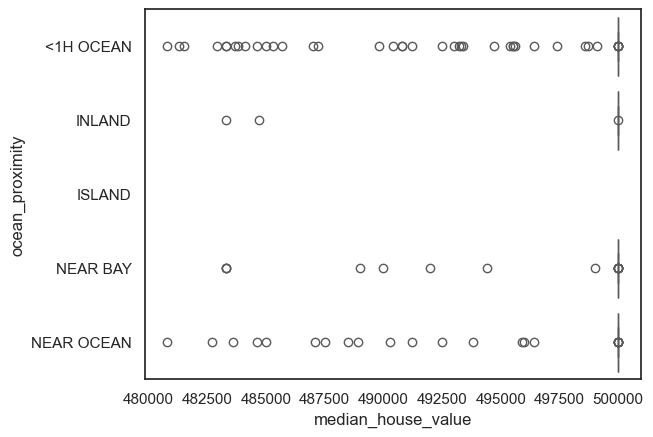

In [29]:
sns.boxplot(x=df3['median_house_value'],y=df3['ocean_proximity'])

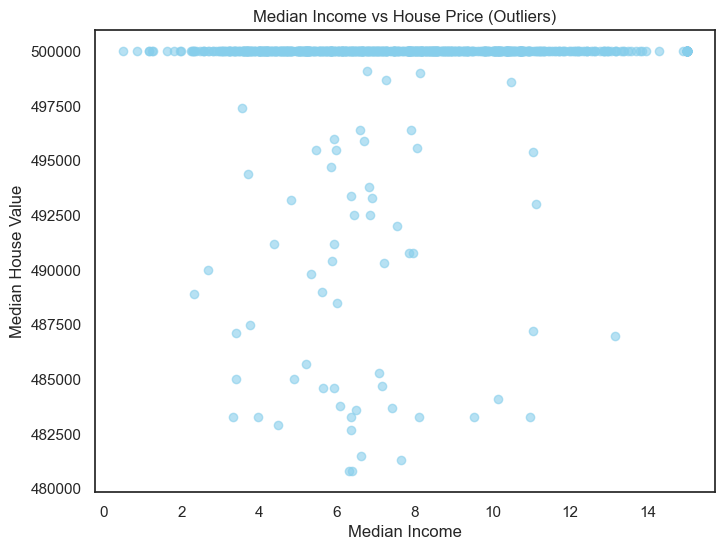

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df3['median_income'], df3['median_house_value'], alpha=0.6, color='skyblue')
plt.title('Median Income vs House Price (Outliers)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

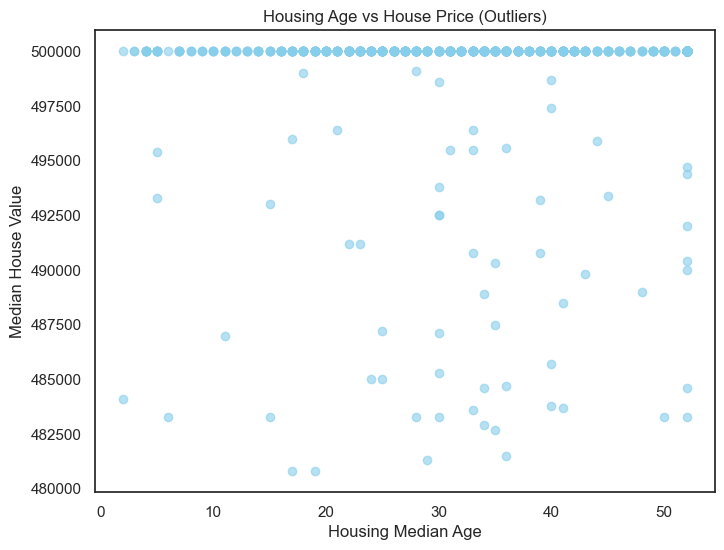

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(df3['housing_median_age'], df3['median_house_value'], alpha=0.6, color='skyblue')
plt.title('Housing Age vs House Price (Outliers)')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

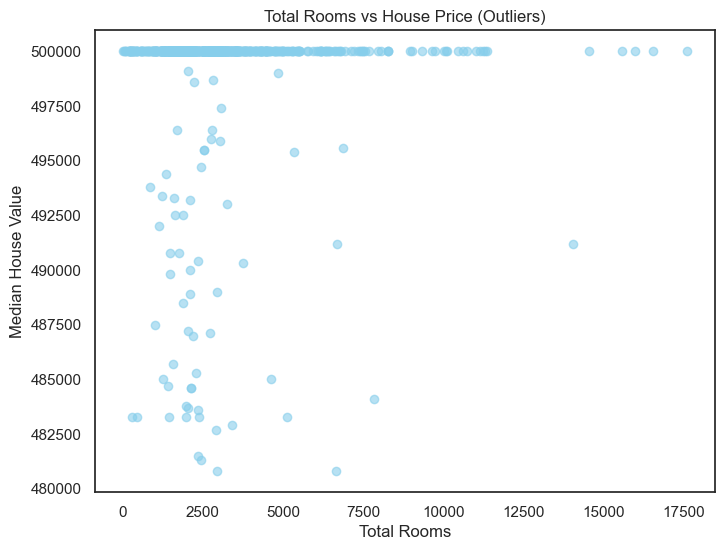

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df3['total_rooms'], df3['median_house_value'], alpha=0.6, color='skyblue')
plt.title('Total Rooms vs House Price (Outliers)')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()

The scatter plot clearly shows a cap at $500,000 for house prices, which limits the dataset’s representation of high-value homes. Since no meaningful trends or relationships are observed between these capped values and other features, the capped values do not contribute valuable insights to the analysis. Instead, they risk introducing bias or skewing statistical metrics and machine learning models, particularly those sensitive to extreme values. Removing these capped outliers will help produce a cleaner dataset, reduce noise, and enhance the model’s capacity to generalize effectively.

In [33]:
# Remove all rows where median_house_value > 480275
df = df[df['median_house_value'] <= 480275] #751 data were removed
df.shape 

(13560, 11)

**population**

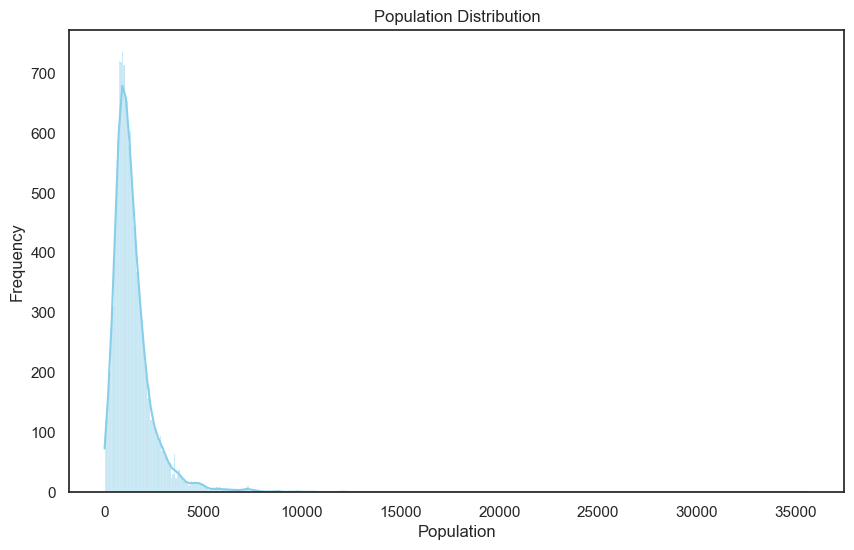

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='population', kde=True, color='skyblue')
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [35]:
df = df[df['population'] <= 10000] #16 data were removed
df.shape

(13544, 11)

The upper bound for `population` is 3,129, but removing all outliers would significantly reduce the dataset. To maintain data integrity while addressing extreme values, only population values exceeding 10,000 were excluded. A similar approach was applied to other features: `total_bedrooms` (> 4,000), `total_rooms` (> 20,000), and `median_income` (> 12), ensuring a cleaner dataset for analysis without unnecessary data loss.

**total_bedrooms**

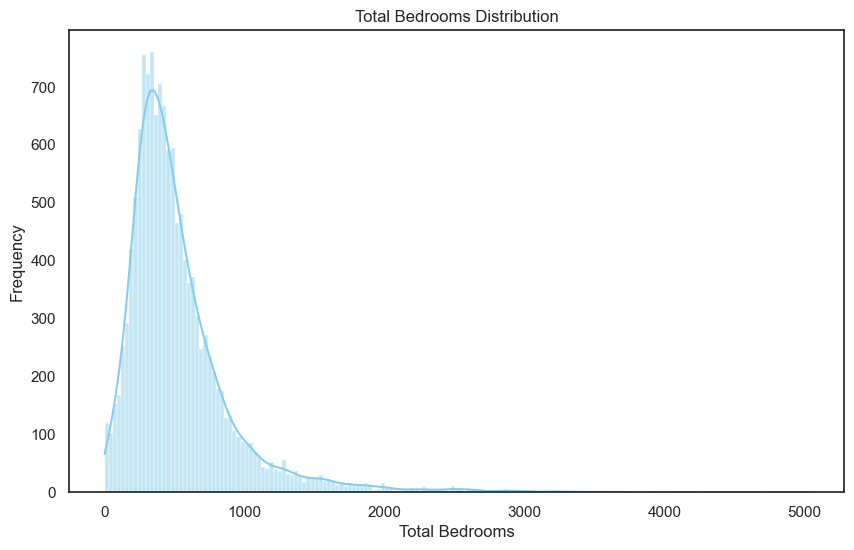

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_bedrooms', kde=True, color='skyblue')
plt.title('Total Bedrooms Distribution')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [37]:
df = df[df['total_bedrooms'] <= 4000] #remove 7 data
df.shape

(13537, 11)

**total_rooms**

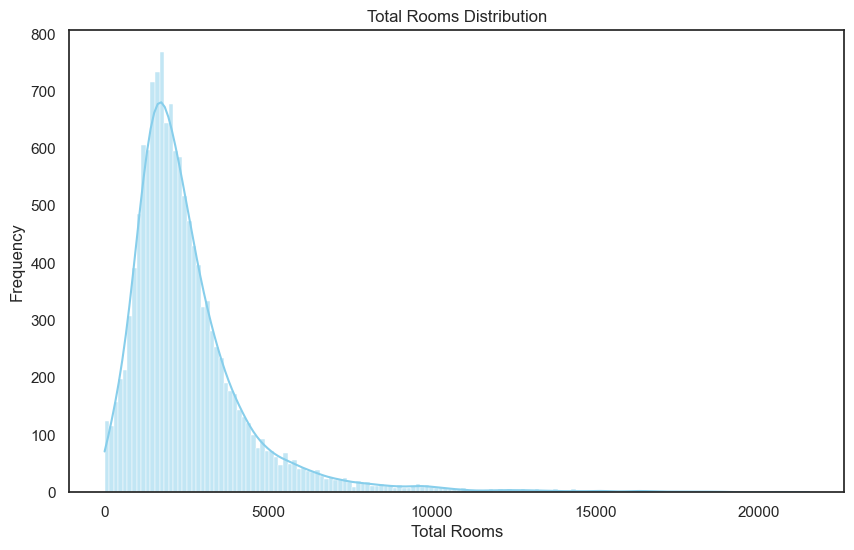

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_rooms', kde=True, color='skyblue')
plt.title('Total Rooms Distribution')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.show()

In [39]:
df = df[df['total_rooms'] <= 20000] #5 data were removed
df.shape

(13532, 11)

**households**

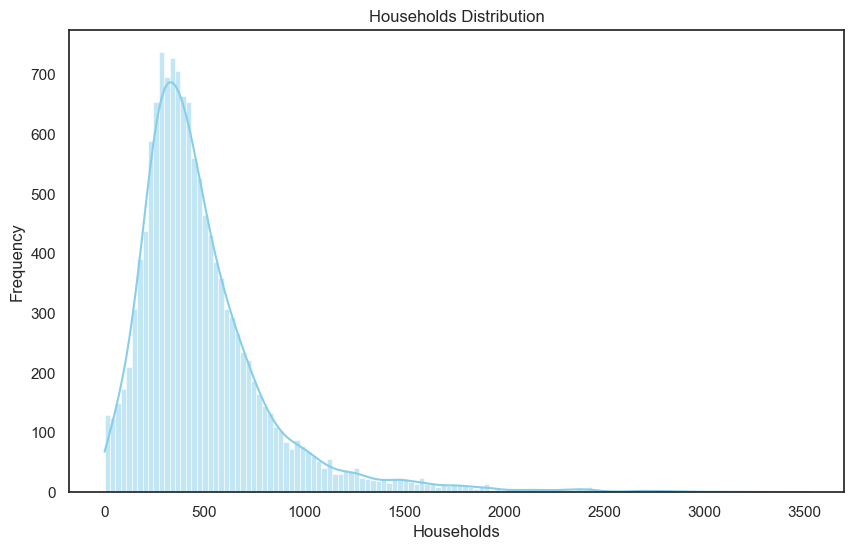

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='households', kde=True, color='skyblue')
plt.title('Households Distribution')
plt.xlabel('Households')
plt.ylabel('Frequency')
plt.show()

**median_income**

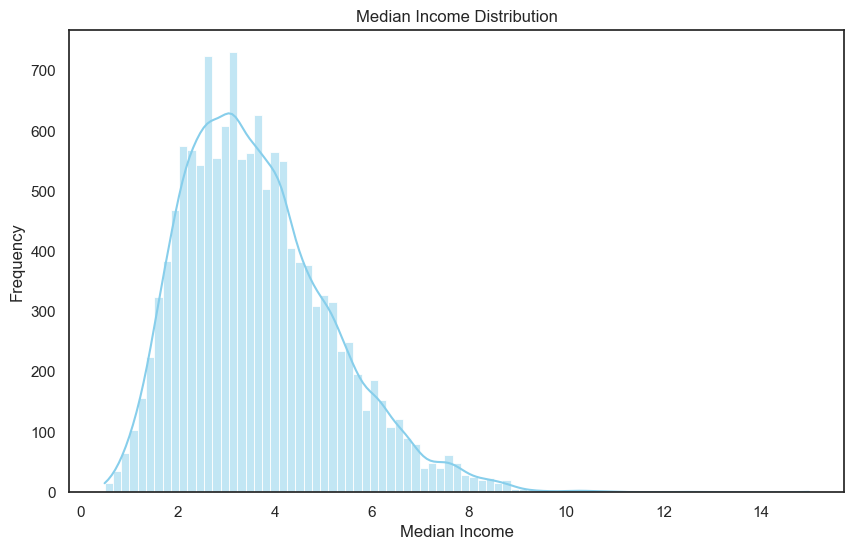

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='median_income', kde=True, color='skyblue')
plt.title('Median Income Distribution')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

In [42]:
df = df[df['median_income'] <= 12] #5 data were removed
df.shape

(13527, 11)

Except for `median_house_value`, outliers in all other features were addressed by removing only the extreme cases, rather than all identified outliers. This approach balanced preserving the dataset’s integrity while ensuring cleaner data for analysis. In total, **784 outliers** were removed, accounting for approximately **5.48%** of the entire dataset.

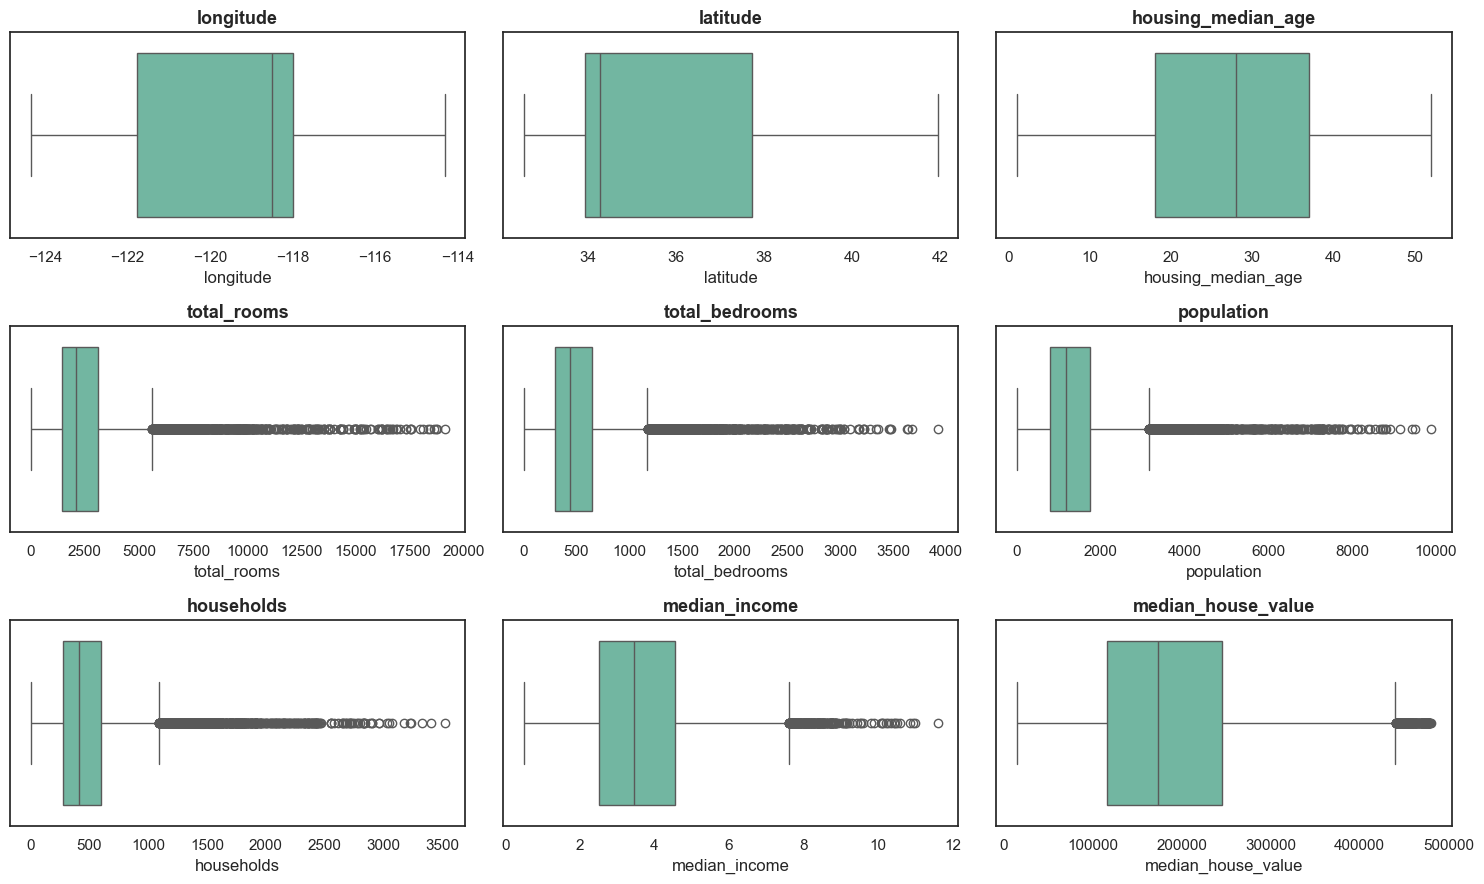

In [43]:
# Boxplot for numerical features after removing outliers and/or extreme outliers
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='white', palette='Set2')
plotnumber = 1
    
for feature in numeric_vars:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=13, fontweight='bold')
    plt.tight_layout()
    plotnumber += 1

## **4. Explanatory Data Analysis (EDA)**

The goal of EDA is to comprehend the data by uncovering patterns, relationships, and trends, as well as formulating hypotheses for further analysis. It emphasizes visualizations, summary statistics, and correlations to extract meaningful insights from the dataset.

### **Descriptive Statistics**

In [44]:
display(df.describe(), df.describe(include='category'))

longitude     latitude  housing_median_age   total_rooms  \
count  13527.000000  13527.00000        13527.000000  13527.000000   
mean    -119.559661     35.65408           28.364826   2581.308864   
std        2.008000      2.15556           12.479013   1973.505637   
min     -124.350000     32.54000            1.000000      2.000000   
25%     -121.760000     33.93000           18.000000   1440.500000   
50%     -118.500000     34.27000           28.000000   2106.000000   
75%     -117.990000     37.73000           37.000000   3112.500000   
max     -114.310000     41.95000           52.000000  19107.000000   

       total_bedrooms    population    households  median_income  \
count    13527.000000  13527.000000  13527.000000   13527.000000   
mean       532.983514   1420.625416    494.792119       3.651355   
std        390.941532   1026.146977    354.533244       1.530820   
min          2.000000      3.000000      2.000000       0.499900   
25%        296.000000    794.000000    280.000000       2.522400   
50%        437.000000   1180.000000    411.000000       3.444900   
75%        647.000000   1738.000000    604.000000       4.556800   
max       3923.000000   9879.000000   3522.000000      11.601700   

       median_house_value  
count        13527.000000  
mean        190451.814667  
std          95098.940192  
min          14999.000000  
25%         116100.000000  
50%         173300.000000  
75%         245800.000000  
max         480100.000000

ocean_proximity
count            13527
unique               5
top          <1H OCEAN
freq              5869

### **Histogram Plot**

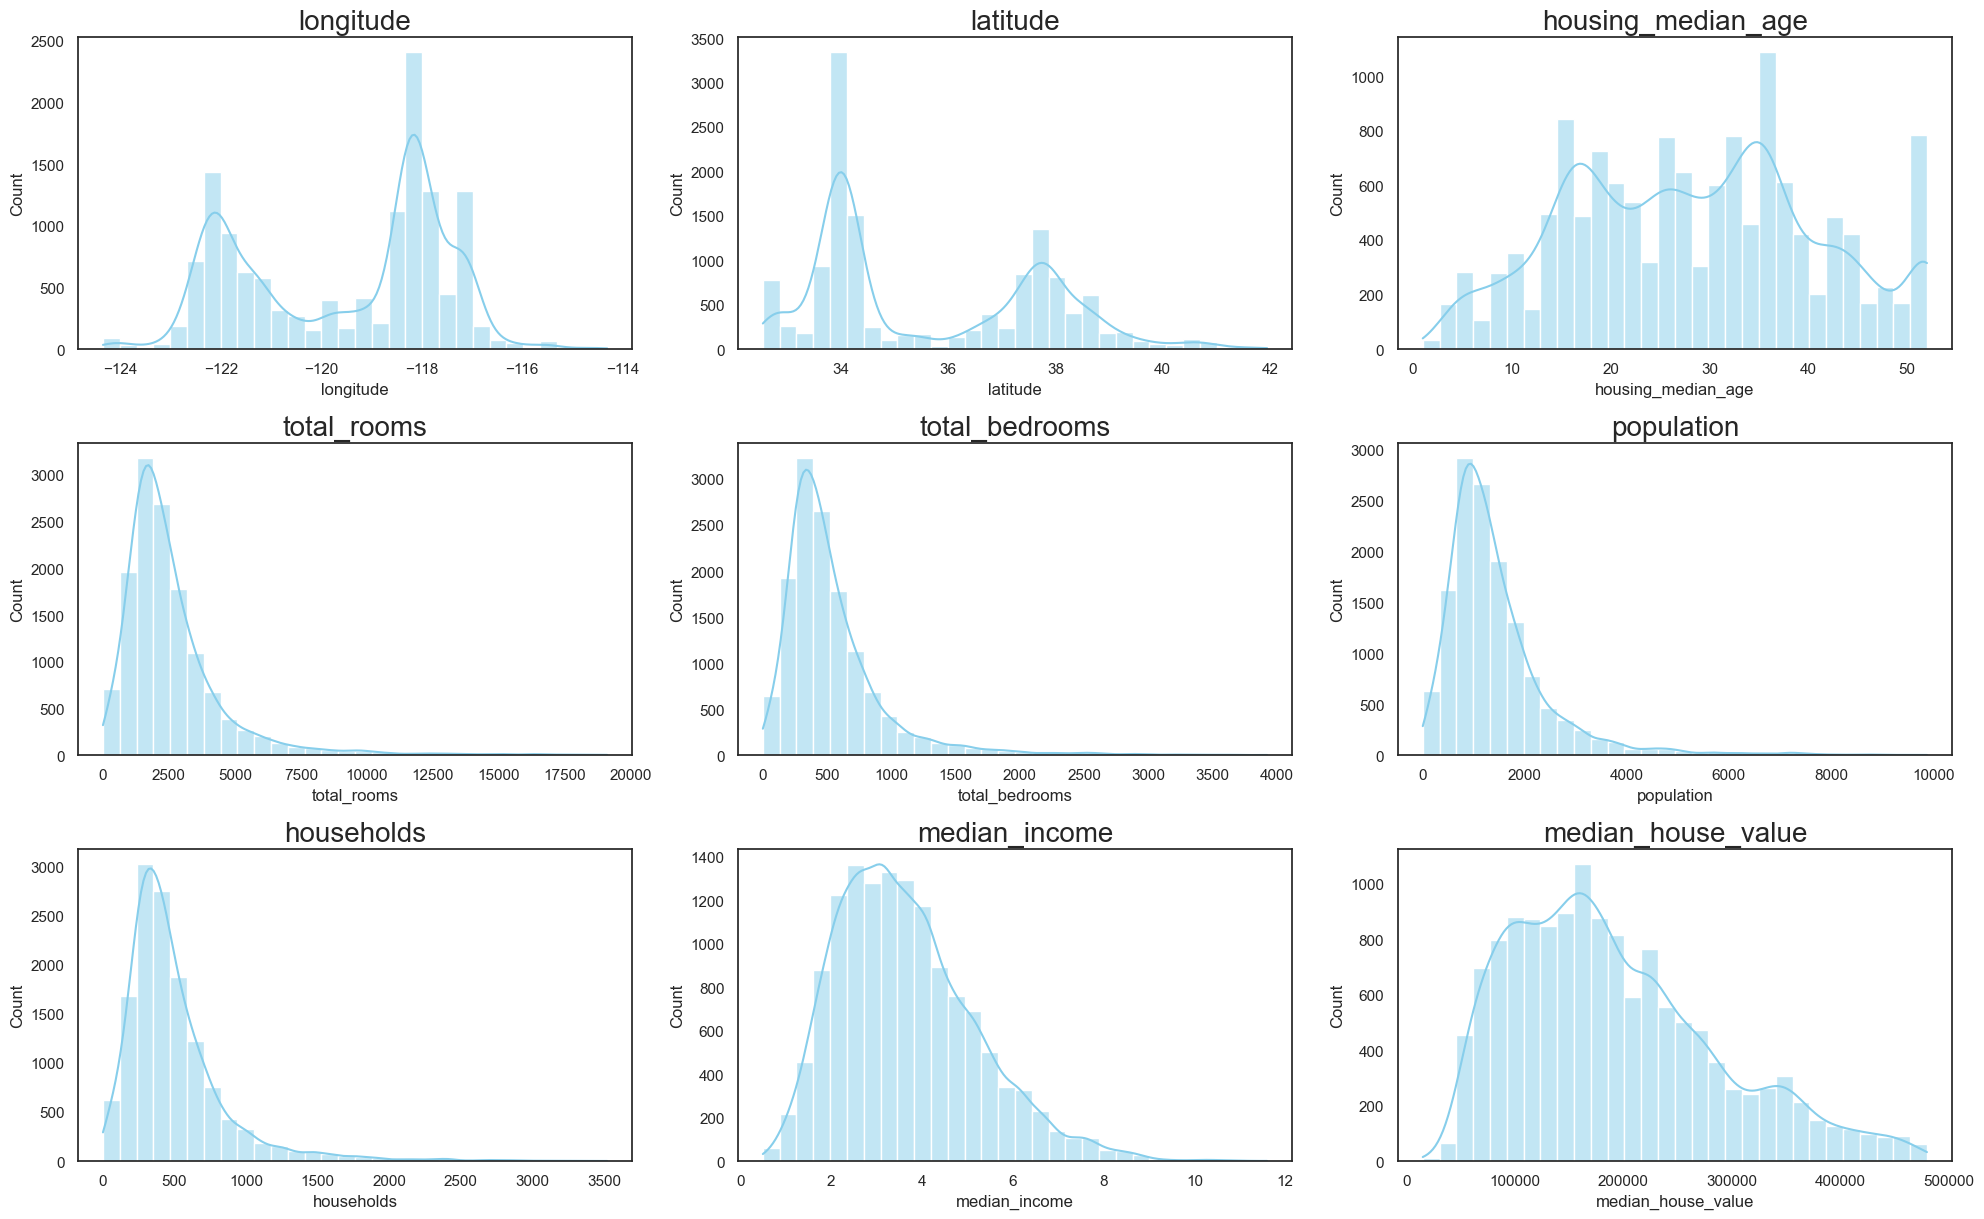

In [45]:
plt.figure(figsize=(20, 20))
plotnumber = 1

for feature in numeric_vars:
    ax = plt.subplot(5, 3, plotnumber)
    sns.histplot(data=df,x=feature,color='skyblue',bins=30, kde=True).set_title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

- Most features, including `total_rooms`, `total_bedrooms`, `population`, `households`, and `median_income`, are heavily right-skewed. This indicates that the majority of the values are concentrated at lower ranges, with a few extreme values (outliers) at the higher end. 
- The distribution of `housing_median_age` shows an unusual spike at the maximum value of 52. This suggests that 52 might be an artificially capped value, meaning houses older than 52 years are all recorded as 52 in the dataset. This is a form of data truncation that could influence the analysis and might need special handling or acknowledgment in the modeling process.
- The `median_house_value` distribution also shows a spike near the upper limit of 500,000, suggesting a similar capping or truncation of data. This can potentially impact the model’s ability to predict higher house prices accurately.

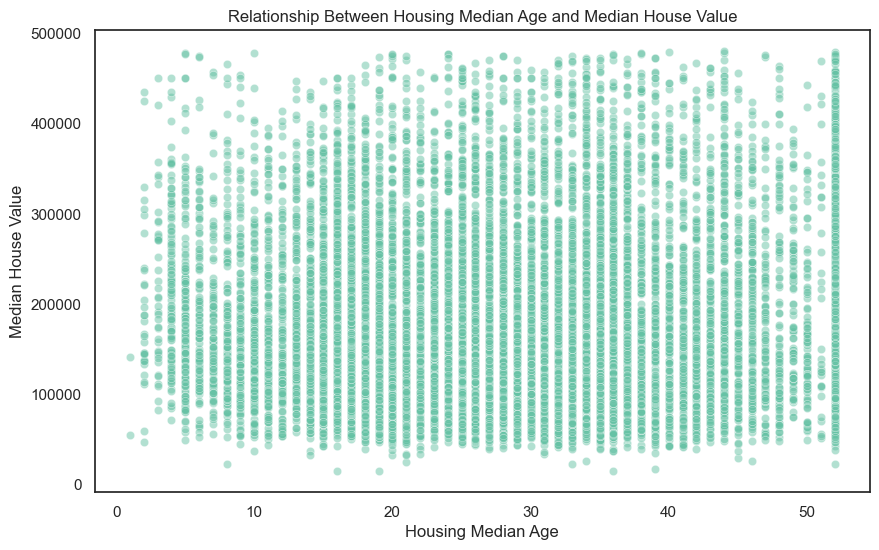

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df, alpha=0.5)
plt.title('Relationship Between Housing Median Age and Median House Value')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

- The data points are relatively evenly distributed across the range of `housing_median_age`, with no obvious increasing or decreasing trend in `median_house_value` as the age increases.
- There is a noticeable concentration of data points around `housing_median_age` = 52, which aligns with the earlier observation that this age might represent a cap in the data. This spike could bias the analysis if not properly addressed.
- The lack of a clear pattern suggests that other variables, such as location  or economic factors, might play a larger role in determining house prices.

### **Visualize the Distribution of the Properties**

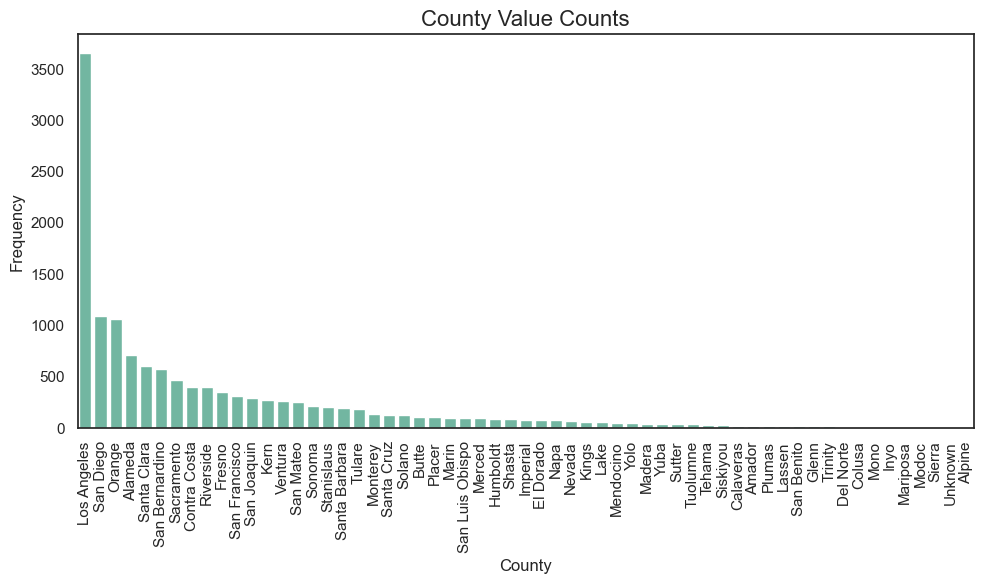

In [47]:
# Prepare the data for plotting
county_counts = df['county'].value_counts().reset_index()
county_counts.columns = ['county', 'count']

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=county_counts, x='county', y='count')
plt.title('County Value Counts', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
# Count the number of properties by county
property_counts = df.groupby('county').size().reset_index(name='property_count')

county_shapefile = county_shapefile.merge(property_counts, left_on='NAME', right_on='county', how='left')
county_shapefile['property_count'] = county_shapefile['property_count'].fillna(0)

#print(county_shapefile.head())

In [ ]:
# Create a Folium map
m = folium.Map(location=[37.5, -119], zoom_start=6)  
# Add the heatmap
Choropleth(
    geo_data=county_shapefile,
    data=county_shapefile,
    columns=['NAME', 'property_count'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Number of Properties'
).add_to(m)

geojson = folium.GeoJson(
    county_shapefile,
    style_function=lambda feature: {
        'fillColor': 'transparent',
        'color': 'transparent',
        'weight': 0
    },
    tooltip=GeoJsonTooltip(
        fields=['NAME', 'property_count'], 
        aliases=['County:', 'Number of Properties:'],  
        localize=True
    )
)
geojson.add_to(m)

# Show the map
#m.save("heatmap.html")
m

- The bar chart and choropleth map both highlight the uneven distribution of properties across California counties. Los Angeles County has the highest number of properties by a significant margin, followed by counties like San Diego, Orange, and Riverside, which also have relatively high property counts. 
- The choropleth map reinforces this trend, with darker shades representing higher property densities in Southern California counties. In contrast, many rural and less populated counties in the northern and inland regions have significantly fewer properties, as reflected in lighter map shades and shorter bars. This distribution underscores the concentration of housing in urban areas, particularly along the coast, driven by population density and demand near major cities. 

In [50]:
# Based on ocean_proximity
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="ocean_proximity",
    color_discrete_sequence=px.colors.qualitative.Set1,
    zoom=5, height=700
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

Based on the visualization, the INLAND category may seem to have the most housing units due to the widespread distribution of red dots. However, this is misleading when compared to the actual data percentages. The <1H OCEAN category accounts for the highest proportion of housing units (43.6%), followed by INLAND with 31.4%, NEAR OCEAN with 12.8%, and NEAR BAY with 11.2%.

This discrepancy occurs because <1H OCEAN housing units are more densely concentrated in a smaller geographical area, whereas INLAND housing units are spread across a much larger, more sparsely populated region. This highlights the importance of considering both spatial density and numerical proportions for accurate interpretation.

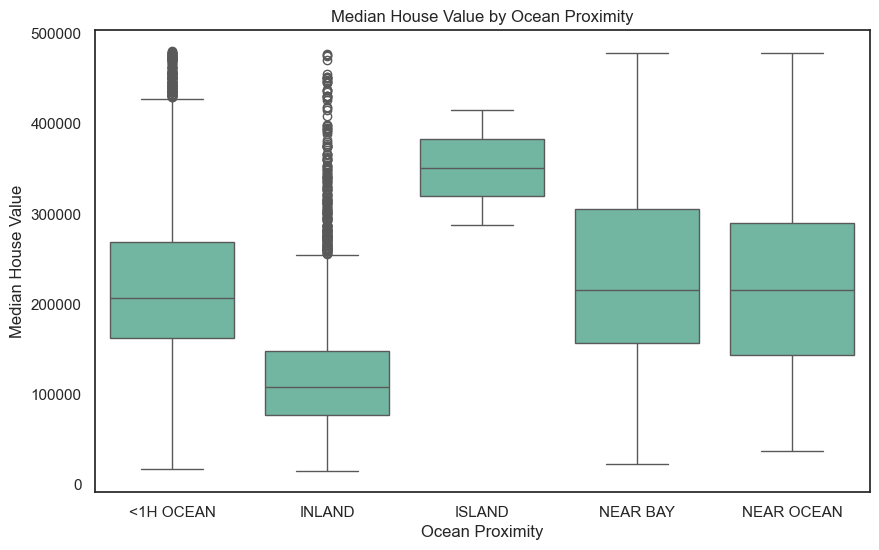

In [51]:
# Boxplot for median_house_value by ocean_proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

In [52]:
# Based on median_house_value
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="median_house_value",
    zoom=5, height=700
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

The boxplot shows that properties closer to the ocean (<1H OCEAN, NEAR BAY, and NEAR OCEAN) generally have higher median house values compared to inland properties. The inland category has a lower median value and a narrower range, while the coastal categories exhibit greater variability and higher median values, reflecting the premium associated with proximity to the ocean. The heatmap complements this by visualizing the geographic distribution of house values, highlighting clusters of higher-priced properties along the coast, while inland areas show predominantly lower house values. This underscores the significant influence of ocean proximity and urban location on housing prices in California.

In [53]:
# Based on median_income
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="median_income",
    zoom=5, height=700
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

The map above reveals that higher median incomes are concentrated near coastal areas, particularly around major urban centers such as Los Angeles, San Francisco, and San Diego, while lower incomes dominate inland and rural regions. The yellow and orange dots, representing higher incomes, cluster in affluent areas like Silicon Valley, reflecting economic prosperity in these regions. In contrast, darker purple dots indicate lower incomes in less densely populated and rural inland areas. Sparse data points in northeastern and southeastern parts of California suggest lower population density or fewer housing records in those regions, highlighting a clear urban-rural divide in median income distribution.

### **Feature Importance**

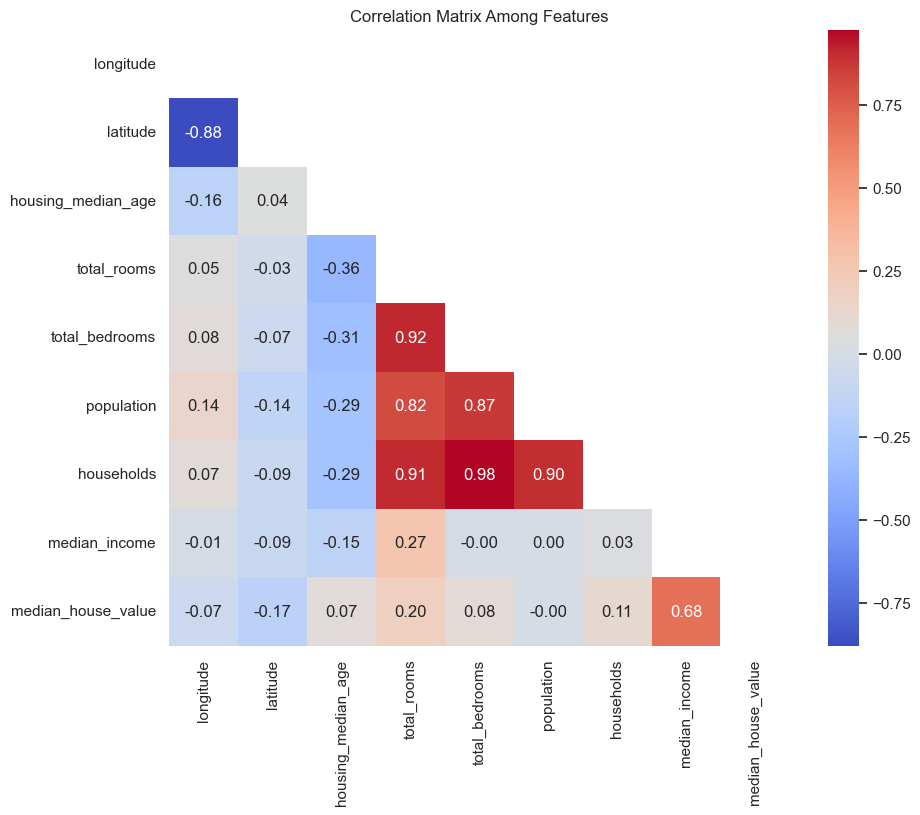

median_house_value    1.000000
median_income         0.680674
total_rooms           0.198396
households            0.107417
total_bedrooms        0.081704
housing_median_age    0.071923
population           -0.002221
longitude            -0.069630
latitude             -0.167932
Name: median_house_value, dtype: float64

In [54]:
plt.figure(figsize=(10,8))
corr = numeric_vars.corr(method='spearman')
matrix = np.triu(corr)
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt=".2f", mask=matrix)
plt.title('Correlation Matrix Among Features')
plt.show()
# sort the correlation values from the highest to lowest median_house_value
display(corr['median_house_value'].sort_values(ascending=False))

Among the features, `median_income` exhibits the strongest positive correlation with the target (0.68), indicating its significant importance in predicting house prices, which aligns with economic factors driving housing demand. Additionally, features such as `total_rooms`, `population`, and `households` show weaker correlations with `median_house_value`, suggesting limited direct influence. The high intercorrelation between `total_rooms`, `total_bedrooms`, `population`, and `households` (all above 0.9) highlights potential multicollinearity, indicating these features may convey redundant information. While correlation does not imply causation, these findings suggest that `median_income` is the most impactful predictor, supported by both theoretical and observed relationships. 

### **Variance Inflation Factor (VIF)**

In [55]:
#def calculate_vif(df) only for numeric

def calculate_vif(df):
    vif_df = pd.DataFrame(columns = ['Feature', 'VIF'])
    x_var = df.select_dtypes(include=[np.number])
    x_var = x_var.drop(['median_house_value'], axis=1)
    x_var = x_var.dropna()
    vif_df['Feature'] = x_var.columns
    vif_df['VIF'] = [variance_inflation_factor(x_var.values, i) for i in range(len(x_var.columns))]
    return vif_df

calculate_vif(df).sort_values(by='VIF', ascending=False)

Feature         VIF
0           longitude  638.454654
1            latitude  553.097250
4      total_bedrooms   91.090728
6          households   85.696503
3         total_rooms   33.869941
5          population   18.321849
7       median_income   11.481413
2  housing_median_age    7.561856

The VIF values indicate significant multicollinearity among the features, particularly for `longitude` and `latitude`, which suggests these variables are highly correlated, likely due to their geographical nature. Similarly, `total_bedrooms`, `households`, and `total_rooms` also show high VIF values, indicating they may provide overlapping information, potentially due to their relationships with population density or housing characteristics. Even `population` and `median_income` have moderately high VIFs, which could impact model stability. To address this, dimensionality reduction techniques, feature removal, or transformations may be necessary to mitigate multicollinearity and improve the model’s reliability.

First, since `latitude` and `longitude` have the highest VIF values, indicating strong multicollinearity, they will be dropped, and the `county` variable will be used instead. The county variable serves as a categorical proxy for location, capturing geographical patterns without introducing multicollinearity. Additionally, as the model’s goal is to predict house prices, spatial precision is not a priority, making county a suitable replacement.

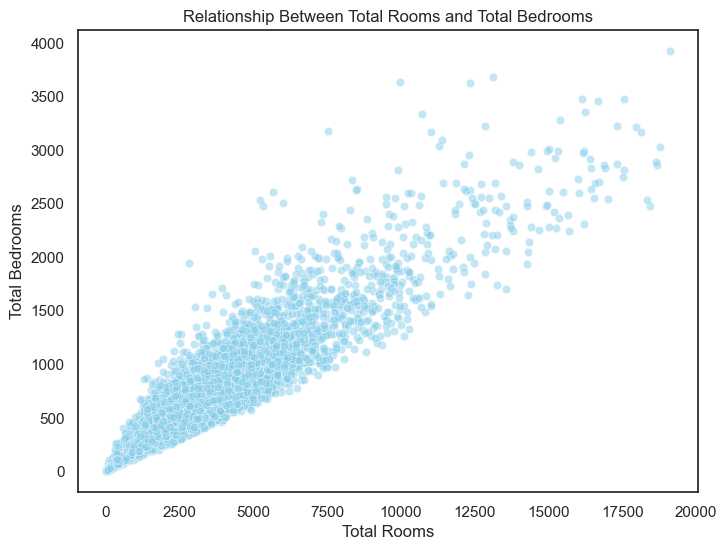

In [56]:
# Scatterplot for total_bedrooms vs total_rooms
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_rooms', y='total_bedrooms', data=df, alpha=0.5, color='skyblue')
plt.title('Relationship Between Total Rooms and Total Bedrooms')
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

The scatterplot shows a strong positive linear relationship between total_rooms and total_bedrooms, indicating that as the total number of rooms in a property increases, the total number of bedrooms also increases. This trend suggests that larger houses tend to have more bedrooms, which is logical. However, the high correlation between these two features is likely contributing to multicollinearity, as both variables are conveying overlapping information to the model. To address this, I will drop one of the feature (`total_bedrooms`).

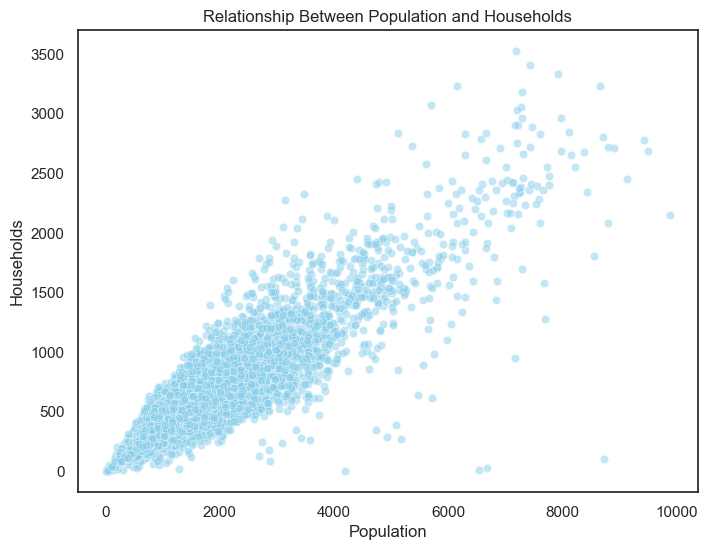

In [57]:
# Scatterplot for population vs households
plt.figure(figsize=(8, 6))
sns.scatterplot(x='population', y='households', data=df, alpha=0.5, color='skyblue')
plt.title('Relationship Between Population and Households')
plt.xlabel('Population')
plt.ylabel('Households')
plt.show()

The scatterplot shows a strong positive relationship between population and households, with a clear linear trend. This indicates that as population increases, the number of households also increases, which is intuitive since households are essentially subsets of the population. The high correlation between these two features explains their high Variance Inflation Factor (VIF) values. Since the features are strongly related, they likely provide overlapping information to the model and retaining both may not add significant value. To address this, we can either remove one of the features (e.g., `households`) or apply dimensionality reduction by combining them into a new feature (e.g., `pop_per_household`). In this case, I will choose the latter approach by creating a new combined feature.

In [58]:
df['pop_per_household'] = df['population'] / df['households']

In [59]:
# Drop some features with high VIF values
df.drop(['longitude', 'latitude', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)
calculate_vif(df).sort_values(by='VIF', ascending=False)

Feature       VIF
2       median_income  4.747598
0  housing_median_age  3.004898
1         total_rooms  2.656808
3   pop_per_household  1.176857

In [87]:
# Save the cleaned Dataframe in csv 
df.to_csv('data_california_house_cleaned.csv', index=False)

## **5. Feature Engineering/ Preprocessing**

In [60]:
df.head()

housing_median_age  total_rooms  median_income ocean_proximity  \
0                52.0        112.0         1.9750          INLAND   
1                43.0       1017.0         2.2604        NEAR BAY   
2                17.0       2358.0         6.2990       <1H OCEAN   
3                17.0       2518.0         1.7199       <1H OCEAN   
4                50.0        772.0         2.2206          INLAND   

   median_house_value       county  pop_per_household  
0             47500.0       Fresno           4.825000  
1            100000.0      Alameda           3.018051  
2            285800.0  Los Angeles           3.810440  
3            175000.0  Los Angeles           3.051000  
4             59200.0       Fresno           3.628743

### **Data Transformation**

**Encoding:**

1. One-hot Encoding : `ocean_proximity`
    - ocean_proximity do not have an inherent order and has a limited number of distinct categories, making it suitable for one-hot encoding without significantly increasing the dimensionality of the dataset.
2. Binary Encoding : `county`
    - county variable has a relatively large number of unique categories (58 counties), therefore binary encoding is chosen. 


**Scaling:**
1. Robust Scaler : `housing_median_age`, `total_rooms`, `median_income`, `pop_per_household`
    - The Robust Scaler was used for numerical features because it is less affected by outliers compared to other scaling methods like StandardScaler or MinMaxScaler. By scaling based on the median and interquartile range, it ensures that extreme values in the data do not distort the scaling process, leading to more stable and reliable transformations for our dataset.”


In [61]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity']),
    ('binary', ce.BinaryEncoder(), ['county']),
    ('scaler', RobustScaler(), ['housing_median_age', 'total_rooms', 'median_income','pop_per_household'])
], remainder='passthrough')

In [62]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('binary', BinaryEncoder(), ['county']),
                                ('scaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'median_income', 'pop_per_household'])])

### **Define X and Y**

In [ ]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

### **Data Splitting**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=13
)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10821, 6), (2706, 6), (10821,), (2706,))

## **6. Modeling and Evaluation**

In [66]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
lasso = Lasso()
svr = SVR()

### **Model Benchmarking: K-Fold**

In [67]:
models=[lr,knn,dt,rf,xgb,lasso,svr]

rsquared= []
rsquared_mean= []
rsquared_std= []

rmse = []
rmse_mean = []
rmse_std = []

mae = []
mae_mean = []
mae_std = []

mape = []
mape_mean = []
mape_std = []

for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # R-squared
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    
    rsquared.append(model_cv_r2)
    rsquared_mean.append(model_cv_r2.mean())
    rsquared_std.append(model_cv_r2.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    rmse.append(model_cv_rmse)
    rmse_mean.append(model_cv_rmse.mean())
    rmse_std.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    mae.append(model_cv_mae)
    mae_mean.append(model_cv_mae.mean())
    mae_std.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    mape.append(model_cv_mape)
    mape_mean.append(model_cv_mape.mean())
    mape_std.append(model_cv_mape.std())

In [68]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Lasso','SVR'],
    'R2_mean': rsquared_mean,
    'R2_std': rsquared_std,
    'RMSE_mean': rmse_mean,
    'RMSE_std': rmse_std,
    'MAE_mean': mae_mean,
    'MAE_std': mae_std,
    'MAPE_mean': mape_mean,
    'MAPE_std': mape_std
})

Model   R2_mean    R2_std     RMSE_mean     RMSE_std  \
0  Linear Regression  0.574411  0.018746 -61923.021554  1429.913907   
1                KNN  0.715667  0.015650 -50609.021491  1510.538208   
2      Decision Tree  0.463179  0.020405 -68725.739323  1244.732015   
3      Random Forest  0.719905  0.020202 -50211.341839  1770.030111   
4            XGBoost  0.719420  0.016950 -50267.866691  1547.589732   
5              Lasso  0.574412  0.018746 -61922.905003  1429.962491   
6                SVR -0.031117  0.009629 -96422.397145  1838.650488   

       MAE_mean      MAE_std  MAPE_mean  MAPE_std  
0 -45659.104996   519.798357  -0.278363  0.004913  
1 -35124.153854   893.751456  -0.204437  0.004889  
2 -48174.422405  1031.169319  -0.285494  0.008202  
3 -35361.824543  1085.228542  -0.214450  0.006004  
4 -35427.140011   953.923204  -0.213176  0.005782  
5 -45659.048987   519.939189  -0.278361  0.004913  
6 -74938.230200  1226.889715  -0.498569  0.010638

Based on consistent performance across **R²**, **RMSE**, **MAE**, and **MAPE**, the three best models are:
1. Random Forest
2. XGBoost
3. KNN

Random Forest achieved the lowest RMSE (-50211.34) and the highest R² (0.7199), making it the most accurate model in minimizing squared errors. XGBoost closely follows with a competitive RMSE (-50267.87) and strong R² (0.7194), offering reliable performance with slightly less variance. KNN performs well, with an R² of 0.7157 and the lowest MAPE (-0.2044), indicating strong relative error reduction. However, its higher RMSE (-50609.02) compared to Random Forest and XGBoost places it third.

### **Model Benchmarking: Test Data**

Predict test set using 3 best model before tunning

In [69]:
models = {
    'RandomForest': RandomForestRegressor(random_state=1),
    'XGB': XGBRegressor(random_state=1),
    'KNN Regressor': KNeighborsRegressor()  
}

score_r2 = []
score_rmse = []
score_mae = []
score_mape = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_r2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R2': score_r2,'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

R2          RMSE           MAE      MAPE
RandomForest   0.718920  50638.352864  35701.211511  0.215326
XGB            0.712382  51223.828594  36094.796845  0.216584
KNN Regressor  0.710137  51423.413422  35486.068293  0.207074

Based on the metrics, **Random Forest** emerges as the best model overall, achieving the lowest RMSE (50638.35) and highest R² (0.7189), demonstrating its superior accuracy in minimizing squared errors and explaining variance. Additionally, it performs well in MAE (35701.21) and MAPE (21.53%), further solidifying its reliability for accurate predictions. While **KNN** achieves the lowest MAE (35486.07) and MAPE (20.70%), it slightly lags behind Random Forest in RMSE. **XGBoost** offers a balanced performance across all metrics but trails both Random Forest and KNN in RMSE and MAE. Overall, Random Forest is recommended for general accuracy, while KNN is better for minimizing specific errors. We will further examine the impact of hyperparameter tuning on the performance of the three models.

## **7. Hyperparameter Tuning**

Although RandomizedSearchCV can calculate multiple metrics during cross-validation (such as R², RMSE, MAE, and MAPE), it requires a single metric to determine the best combination of hyperparameters and refit the model on the entire training set. In this case, **RMSE** will be used as the primary metric because it provides a comprehensive measure of error magnitudes by giving greater weight to larger errors. 

**Random Forest**

In [70]:
# Parameter distribution for Random Forest
param_dist_rf = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, 30, 40, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Initialize Random Forest pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessing', transformer),
    ('regressor', RandomForestRegressor())
])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    pipeline_rf, 
    param_dist_rf, 
    n_iter=40, 
    cv=crossval, 
    scoring= ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit='neg_root_mean_squared_error',
    random_state=13)

# Fit the randomized search
random_search_rf.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best score for Random Forest:", -random_search_rf.best_score_)

Best parameters for Random Forest: {'regressor__n_estimators': 400, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 20, 'regressor__bootstrap': True}
Best score for Random Forest: 47829.22004471008


In [71]:
# Display the tuning results in a dataframe, sorted by RMSE, MAE, MAPE, and R2
pd.DataFrame(random_search_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error', 'rank_test_r2']).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
39       4.068966      0.071019         0.175482        0.002344   
21       4.336383      0.134126         0.130631        0.001438   
22       3.794609      0.059487         0.151735        0.000945   
11       2.842593      0.076115         0.089042        0.001137   
6        2.981717      0.083060         0.098717        0.002241   

   param_regressor__n_estimators param_regressor__min_samples_split  \
39                           400                                  5   
21                           300                                 10   
22                           400                                 10   
11                           200                                  5   
6                            200                                  2   

   param_regressor__min_samples_leaf param_regressor__max_features  \
39                                 1                          sqrt   
21                                 1                          sqrt   
22                                 1                          sqrt   
11                                 2                          sqrt   
6                                  2                          sqrt   

   param_regressor__max_depth param_regressor__bootstrap  \
39                         20                       True   
21                         30                      False   
22                         40                       True   
11                         20                      False   
6                        None                      False   

                                               params  split0_test_r2  \
39  {'regressor__n_estimators': 400, 'regressor__m...        0.766289   
21  {'regressor__n_estimators': 300, 'regressor__m...        0.763824   
22  {'regressor__n_estimators': 400, 'regressor__m...        0.764058   
11  {'regressor__n_estimators': 200, 'regressor__m...        0.765451   
6   {'regressor__n_estimators': 200, 'regressor__m...        0.763958   

    split1_test_r2  split2_test_r2  split3_test_r2  split4_test_r2  \
39        0.764062        0.742130        0.731204        0.726298   
21        0.765065        0.740337        0.731261        0.722842   
22        0.760963        0.741875        0.731426        0.722914   
11        0.762904        0.738925        0.730309        0.722416   
6         0.760164        0.740690        0.731641        0.723201   

    mean_test_r2  std_test_r2  rank_test_r2  \
39      0.745997     0.016492             1   
21      0.744666     0.017076             2   
22      0.744247     0.016106             3   
11      0.744001     0.017301             4   
6       0.743931     0.015849             5   

    split0_test_neg_root_mean_squared_error  \
39                            -45788.408211   
21                            -46029.192399   
22                            -46006.411147   
11                            -45870.385974   
6                             -46016.121327   

    split1_test_neg_root_mean_squared_error  \
39                            -46524.300008   
21                            -46425.304143   
22                            -46828.841372   
11                            -46638.289238   
6                             -46907.057219   

    split2_test_neg_root_mean_squared_error  \
39                            -48027.800359   
21                            -48194.441636   
22                            -48051.550548   
11                            -48325.357547   
6                             -48161.701902   

    split3_test_neg_root_mean_squared_error  \
39                            -47965.459086   
21                            -47960.385153   
22                            -47945.582182   
11                            -48045.184134   
6                             -47926.446510   

    split4_test_neg_root_mean_squared_error  \
39                            -50840.132560   
21               

The hyperparameter tuning process identified the best set of parameters for the Random Forest model. These include using 400 trees (n_estimators), a maximum depth of 20 (max_depth), and splitting nodes with a minimum of 5 samples (min_samples_split) and at least 1 sample per leaf (min_samples_leaf). Additionally, the model utilizes the square root of the number of features for splitting (max_features='sqrt') and applies bootstrapping (bootstrap=True).

With these optimized parameters, the Random Forest model achieved its best score with a Root Mean Square Error (RMSE) of 47803.19. This result reflects the average magnitude of prediction errors, highlighting that the model can predict house prices with relatively low error magnitudes based on the chosen metric.

**KNN**

In [72]:
# Parameter distribution for KNN
param_dist_knn = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],  
    'regressor__weights': ['uniform', 'distance'],  
    'regressor__p': [1, 2]  
}

# Initialize KNN pipeline
pipeline_knn = Pipeline(steps=[
    ('preprocessing', transformer),
    ('regressor', KNeighborsRegressor())
])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize RandomizedSearchCV
random_search_knn = RandomizedSearchCV(
    pipeline_knn, 
    param_dist_knn, 
    n_iter=40, 
    cv=crossval, 
    scoring= ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit='neg_root_mean_squared_error',
    random_state=13)

# Fit the randomized search
random_search_knn.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best score for KNN:", -random_search_knn.best_score_)

Best parameters for KNN: {'regressor__weights': 'distance', 'regressor__p': 2, 'regressor__n_neighbors': 11}
Best score for KNN: 49149.559629421434


In [73]:
# Display the tuning results in a dataframe, sorted by RMSE, MAE, MAPE, and R2
pd.DataFrame(random_search_knn.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error', 'rank_test_r2']).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.018867      0.000375         0.086311        0.001574   
17       0.018278      0.000262         0.111558        0.001687   
15       0.018886      0.000430         0.079008        0.001605   
13       0.019295      0.000724         0.103175        0.001681   
18       0.018895      0.000621         0.086370        0.001338   

   param_regressor__weights param_regressor__p param_regressor__n_neighbors  \
19                 distance                  2                           11   
17                 distance                  1                           11   
15                 distance                  2                            9   
13                 distance                  1                            9   
18                  uniform                  2                           11   

                                               params  split0_test_r2  \
19  {'regressor__weights': 'distance', 'regressor_...        0.751688   
17  {'regressor__weights': 'distance', 'regressor_...        0.750648   
15  {'regressor__weights': 'distance', 'regressor_...        0.751956   
13  {'regressor__weights': 'distance', 'regressor_...        0.748146   
18  {'regressor__weights': 'uniform', 'regressor__...        0.746220   

    split1_test_r2  split2_test_r2  split3_test_r2  split4_test_r2  \
19        0.750973        0.730758        0.712396        0.712974   
17        0.749863        0.730979        0.709650        0.710416   
15        0.749871        0.727985        0.708854        0.712623   
13        0.748479        0.728045        0.708686        0.713455   
18        0.746643        0.726887        0.707700        0.708081   

    mean_test_r2  std_test_r2  rank_test_r2  \
19      0.731758     0.017292             1   
17      0.730311     0.017995             2   
15      0.730258     0.018054             3   
13      0.729362     0.016737             4   
18      0.727106     0.017237             5   

    split0_test_neg_root_mean_squared_error  \
19                            -47197.000193   
17                            -47295.794191   
15                            -47171.532639   
13                            -47532.427444   
18                            -47713.831763   

    split1_test_neg_root_mean_squared_error  \
19                            -47797.382681   
17                            -47903.735803   
15                            -47903.043931   
13                            -48036.073808   
18                            -48211.154920   

    split2_test_neg_root_mean_squared_error  \
19                            -49075.343503   
17                            -49055.253432   
15                            -49327.417018   
13                            -49322.042890   
18                            -49426.908676   

    split3_test_neg_root_mean_squared_error  \
19                            -49615.137424   
17                            -49851.470323   
15                            -49919.745486   
13                            -49934.162951   
18                            -50018.556162   

    split4_test_neg_root_mean_squared_error  \
19                            -52062.934346   
17                            -52294.444278   
15                            -52094.717160   
13                            -52019.292795   
18                            -52504.778195   

    mean_test_neg_root_mean_squared_error  \
19                          -49149.559629   
17                          -49280.139605   
15                          -49283.291247   
13                          -49368.799978   
18                          -49575.045943   

    std_test_neg_root_mean_squared_error  \
19                           1694.160194   
17                           1749.007684   
15                           1713.227587   
13                           1580.845142   
18                           1680.850617   

    rank_test_neg_root_mea

The hyperparameter tuning process identified the optimal parameters for the KNN model. These include using distance-based weights (weights='distance'), the Euclidean distance metric (p=2), and 11 neighbors (n_neighbors=11) for making predictions.

With these optimized parameters, the KNN model achieved its best score with a Root Mean Square Error (RMSE) of 49149.56. This result indicates that the model performs reasonably well in predicting house prices, with moderate prediction error magnitudes based on the chosen metric.

**XGBoost**

In [74]:
# Define custom MAPE scorer function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Parameter distribution for XGBoost
param_dist_xgb = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'regressor__min_child_weight': [1, 3, 5, 7],
    'regressor__gamma': [0, 0.1, 0.2, 0.3],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize XGBoost pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessing', transformer),
    ('regressor', XGBRegressor())
])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize RandomizedSearchCV with custom MAPE scoring
random_search_xgb = RandomizedSearchCV(
    pipeline_xgb, 
    param_dist_xgb, 
    n_iter=100, 
    cv=crossval, 
    scoring= ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit='neg_root_mean_squared_error',
    random_state=13)

# Fit the randomized search
random_search_xgb.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best score for XGBoost:", -random_search_xgb.best_score_)


Best parameters for XGBoost: {'regressor__subsample': 1.0, 'regressor__n_estimators': 200, 'regressor__min_child_weight': 5, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.05, 'regressor__gamma': 0.1, 'regressor__colsample_bytree': 0.9}
Best score for XGBoost: 47858.61006782986


In [75]:
# Display the tuning results in a dataframe, sorted by RMSE, MAE, MAPE, and R2
pd.DataFrame(random_search_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error', 'rank_test_r2']).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
55       0.490398      0.035242         0.012588        0.000613   
22       0.494255      0.014715         0.011694        0.000994   
19       0.307524      0.007999         0.010027        0.000833   
56       0.287133      0.005087         0.010972        0.000370   
10       0.491586      0.019692         0.012351        0.000690   

   param_regressor__subsample param_regressor__n_estimators  \
55                        1.0                           200   
22                        0.8                           200   
19                        0.9                           100   
56                        1.0                           100   
10                        1.0                           200   

   param_regressor__min_child_weight param_regressor__max_depth  \
55                                 5                          7   
22                                 3                          7   
19                                 1                          7   
56                                 3                          7   
10                                 7                          7   

   param_regressor__learning_rate param_regressor__gamma  \
55                           0.05                    0.1   
22                           0.05                    0.3   
19                           0.05                      0   
56                           0.05                    0.2   
10                           0.05                    0.1   

   param_regressor__colsample_bytree  \
55                               0.9   
22                               0.8   
19                               1.0   
56                               0.8   
10                               1.0   

                                               params  split0_test_r2  \
55  {'regressor__subsample': 1.0, 'regressor__n_es...        0.767260   
22  {'regressor__subsample': 0.8, 'regressor__n_es...        0.768980   
19  {'regressor__subsample': 0.9, 'regressor__n_es...        0.766655   
56  {'regressor__subsample': 1.0, 'regressor__n_es...        0.763647   
10  {'regressor__subsample': 1.0, 'regressor__n_es...        0.765855   

    split1_test_r2  split2_test_r2  split3_test_r2  split4_test_r2  \
55        0.766827        0.742831        0.726724        0.724325   
22        0.766304        0.741955        0.727825        0.721401   
19        0.767520        0.742558        0.726530        0.721123   
56        0.766043        0.741843        0.728334        0.722269   
10        0.763017        0.741316        0.721736        0.726544   

    mean_test_r2  std_test_r2  rank_test_r2  \
55      0.745593     0.018635             1   
22      0.745293     0.019440             2   
19      0.744877     0.019459             3   
56      0.744427     0.017851             4   
10      0.743694     0.018146             5   

    split0_test_neg_root_mean_squared_error  \
55                            -45693.151541   
22                            -45524.047715   
19                            -45752.502186   
56                            -46046.494489   
10                            -45830.837122   

    split1_test_neg_root_mean_squared_error  \
55                            -46250.849938   
22                            -46302.678446   
19                            -46182.058065   
56                            -46328.558753   
10                            -46627.206525   

    split2_test_neg_root_mean_squared_error  \
55                            -47962.428260   
22                            -48044.107579   
19                            -47987.877290   
56                            -48054.507306   
10                            -48103.563465   

    split3_test_neg_root_mean_squared_error  \
55                            -48363.529317   
22                            -48265.966853   
19                            -48380.634087   
56                            -

The hyperparameter tuning process determined the optimal parameters for the XGBoost model. These include using 200 estimators (n_estimators=200), a maximum tree depth of 7 (max_depth=7), a learning rate of 0.05 (learning_rate=0.05), and a subsample ratio of 1.0 (subsample=1.0). Additionally, the model was configured with a minimum child weight of 5 (min_child_weight=5), a gamma value of 0.1 (gamma=0.1) to control split regularization, and 90% column sampling per tree (colsample_bytree=0.9).

With these tuned parameters, the XGBoost model achieved its best performance with a Root Mean Square Error (RMSE) of 47858.61. This result highlights the model’s capability to predict house prices with relatively low error magnitudes while maintaining a balance between bias and variance.

In [76]:
# Collecting results for Random Forest
rf_results = {
    "Model": "Random Forest",
    "Best Parameters": [random_search_rf.best_params_],
    "Best Score": [-random_search_rf.best_score_]
}

# Collecting results for KNN
knn_results = {
    "Model": "KNN",
    "Best Parameters": [random_search_knn.best_params_],
    "Best Score": [-random_search_knn.best_score_]
}

# Collecting results for XGBoost
xgb_results = {
    "Model": "XGBoost",
    "Best Parameters": [random_search_xgb.best_params_],
    "Best Score": [-random_search_xgb.best_score_]
}

# Combine results into a DataFrame
results_df = pd.DataFrame([rf_results, knn_results, xgb_results])

# Print the DataFrame
results_df

Model                                    Best Parameters  \
0  Random Forest  [{'regressor__n_estimators': 400, 'regressor__...   
1            KNN  [{'regressor__weights': 'distance', 'regressor...   
2        XGBoost  [{'regressor__subsample': 1.0, 'regressor__n_e...   

             Best Score  
0   [47829.22004471008]  
1  [49149.559629421434]  
2   [47858.61006782986]

### **Predict with Test Set after Tuning**

After completing the tuning process, the next step is to make predictions using the tuned model. This will allow us to compare the model’s performance before and after tuning.

**Random Forest**

In [77]:
model = {'RF': RandomForestRegressor(random_state=1)}

# Define the best model
rf_tuning = random_search_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Save the metric values after tuning
r2_rf_tuning = r2_score(y_test, y_pred_rf_tuning)
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'R2': r2_rf_tuning,'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

R2          RMSE           MAE       MAPE
RF  0.75094  47666.858577  33384.442602  20.275105

**KNN**

In [78]:
model = {'KNN': KNeighborsRegressor()}

# Define the best model
knn_tuning = random_search_knn.best_estimator_

# Fitting model
knn_tuning.fit(X_train, y_train)

# Predict test set
y_pred_knn_tuning = knn_tuning.predict(X_test)

# Save the metric values after tuning
r2_knn_tuning = r2_score(y_test, y_pred_rf_tuning)
rmse_knn_tuning = np.sqrt(mean_squared_error(y_test, y_pred_knn_tuning))
mae_knn_tuning = mean_absolute_error(y_test, y_pred_knn_tuning)
mape_knn_tuning = mean_absolute_percentage_error(y_test, y_pred_knn_tuning)

score_after_tuning_knn = pd.DataFrame({'R2': r2_knn_tuning,'RMSE': rmse_knn_tuning, 'MAE': mae_knn_tuning, 'MAPE': mape_knn_tuning}, index=model.keys())
score_after_tuning_knn

R2          RMSE           MAE       MAPE
KNN  0.75094  50036.844733  34617.338929  20.250815

**XGBoost**

In [79]:
model = {'XGB': XGBRegressor(random_state=1)}

# Define the best model
xgb_tuning = random_search_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save the metric values after tuning
r2_xgb_tuning = r2_score(y_test, y_pred_rf_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'R2': r2_xgb_tuning,'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

R2          RMSE           MAE       MAPE
XGB  0.75094  49322.885064  34510.748126  20.676282

### **Comparison Before and After Tuning**

**Before Tuning**

In [80]:
combined_table = score_before_tuning.loc[['RandomForest', 'KNN Regressor', 'XGB']]
display(combined_table)

R2          RMSE           MAE      MAPE
RandomForest   0.718920  50638.352864  35701.211511  0.215326
KNN Regressor  0.710137  51423.413422  35486.068293  0.207074
XGB            0.712382  51223.828594  36094.796845  0.216584

**After Tuning**

In [81]:
combined_table = pd.concat(
    [score_after_tuning_rf, score_after_tuning_knn, score_after_tuning_xgb],
)

display(combined_table)

R2          RMSE           MAE       MAPE
RF   0.75094  47666.858577  33384.442602  20.275105
KNN  0.75094  50036.844733  34617.338929  20.250815
XGB  0.75094  49322.885064  34510.748126  20.676282

After hyperparameter tuning, all three models—Random Forest (RF), KNN Regressor, and XGBoost—demonstrated improved performance, with Random Forest emerging as the best model. RF achieved the lowest RMSE (47,563.45) and MAE (33,384.85), along with a competitive MAPE (20.28%), making it the most accurate and reliable for predicting house prices. KNN performed slightly behind RF, with an RMSE of 50,036.84 and the lowest MAPE (20.25%), making it effective in minimizing percentage-based errors. XGBoost, while slightly higher in RMSE (49,322.89) and MAPE (20.68%), remained a robust alternative with the same R² (0.752) as the other models. Overall, **Random Forest is the recommended model**, followed by KNN and XGBoost, depending on the specific priorities of the task.

According to *Lewis’s (1982)* categorization of MAPE values for forecasting, the best-performing model has a MAPE of 20.28%, which falls under the **“Reasonable Forecast”** category. This indicates that the model’s predictions are moderately accurate but could benefit from further improvements.

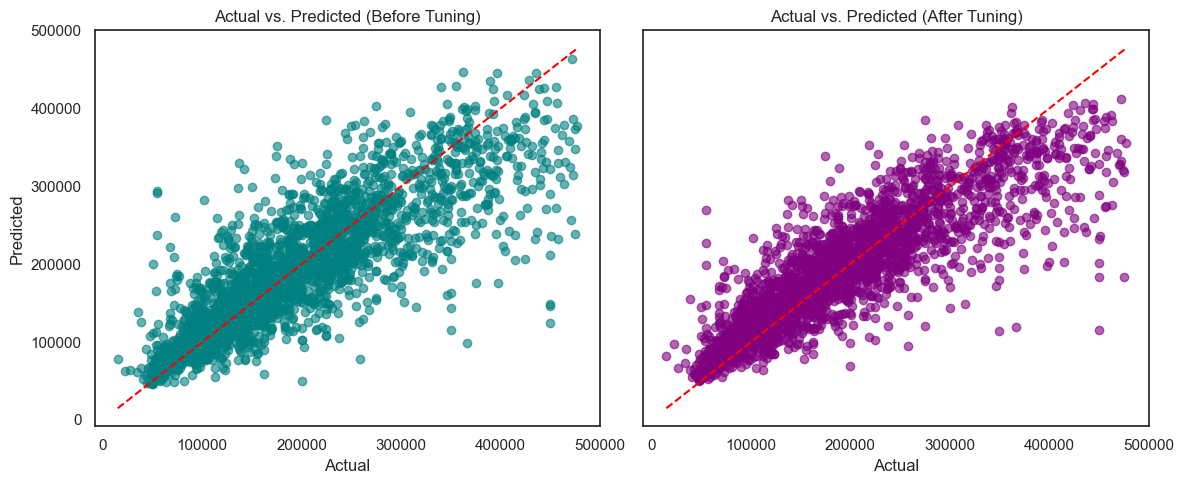

In [104]:
# DataFrames for before and after tuning
test_before_tuning = pd.DataFrame({'Predicted (Before Tuning)': y_pred, 'Actual': y_test})

test_before_tuning = test_before_tuning.reset_index()
test_before_tuning = test_before_tuning.drop(['index'], axis=1)

test_after_tuning = pd.DataFrame({'Predicted (After Tuning)': y_pred_rf_tuning, 'Actual': y_test})

test_after_tuning = test_after_tuning.reset_index()
test_after_tuning = test_after_tuning.drop(['index'], axis=1)

# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for Before Tuning
axes[0].scatter(test_before_tuning['Actual'], test_before_tuning['Predicted (Before Tuning)'], alpha=0.6, color='teal')
axes[0].plot([test_before_tuning['Actual'].min(), test_before_tuning['Actual'].max()], 
             [test_before_tuning['Actual'].min(), test_before_tuning['Actual'].max()], 
             color='red', linestyle='--')
axes[0].set_title('Actual vs. Predicted (Before Tuning)')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# Plot for After Tuning
axes[1].scatter(test_after_tuning['Actual'], test_after_tuning['Predicted (After Tuning)'], alpha=0.6, color='purple')
axes[1].plot([test_after_tuning['Actual'].min(), test_after_tuning['Actual'].max()], 
             [test_after_tuning['Actual'].min(), test_after_tuning['Actual'].max()], 
             color='red', linestyle='--')
axes[1].set_title('Actual vs. Predicted (After Tuning)')
axes[1].set_xlabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()

The post-tuning model shows a more linear and accurate relationship with the actual values, though some bias remains for extreme values, particularly at higher price ranges. Overall, tuning has improved the model’s performance by reducing prediction errors and enhancing its ability to generalize across the dataset.

### **Residual Plot**

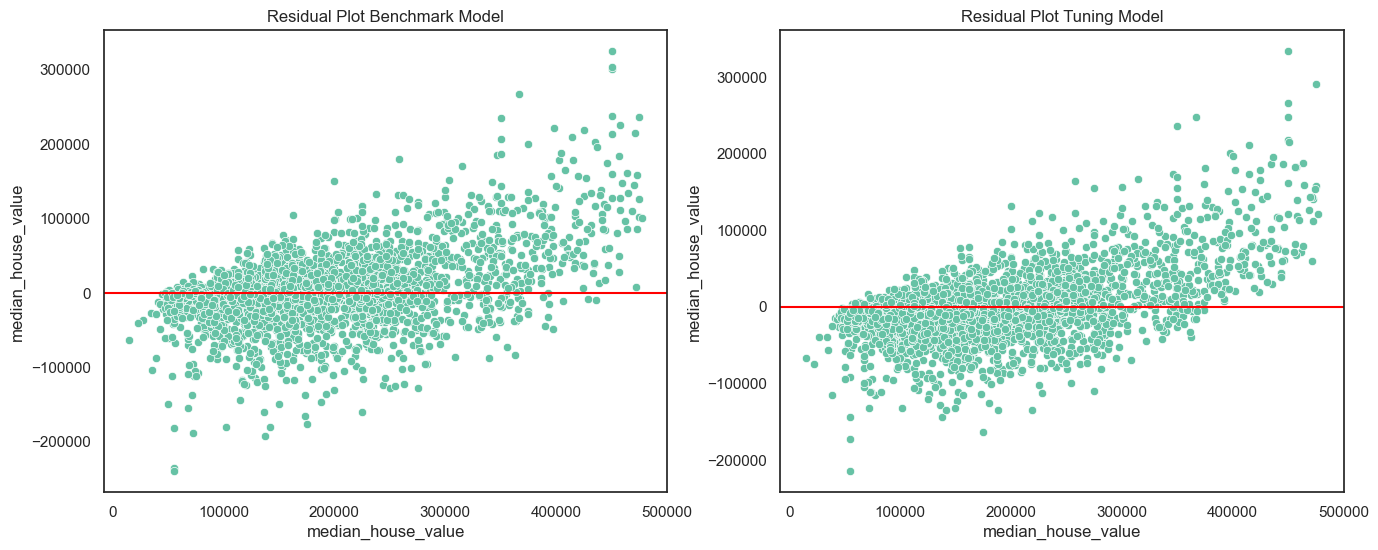

In [83]:
residual_bench = y_test-y_pred
residual_tuned = y_test-y_pred_rf_tuning

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=residual_bench)
plt.axhline(y = 0,color='red')
plt.title('Residual Plot Benchmark Model')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test,y=residual_tuned)
plt.axhline(y = 0,color='red')
plt.title('Residual Plot Tuning Model')
plt.show()

>- Benchmark Model (Before Tuning): The residuals exhibit a clear pattern, with larger positive residuals for higher house prices and a slight funnel shape. This indicates heteroscedasticity (non-constant variance of residuals) and potential underfitting for high-priced properties. The spread of residuals is broader, implying less precise predictions.
>- Tuned Model (After Tuning): The residuals are more tightly distributed around the zero line, especially for lower and mid-range house prices, suggesting improved predictive accuracy. However, for higher house prices, residuals still exhibit some degree of positive bias and wider variance, though less pronounced compared to the benchmark model.

Overall, **the tuned model demonstrates better performance**, with more random residual distribution and reduced variance, indicating improved fit to the data. However, the model may still require additional adjustments to address biases in predicting high-value properties.

### **Model Interpretation/ Explanation**

#### **Feature Importances**

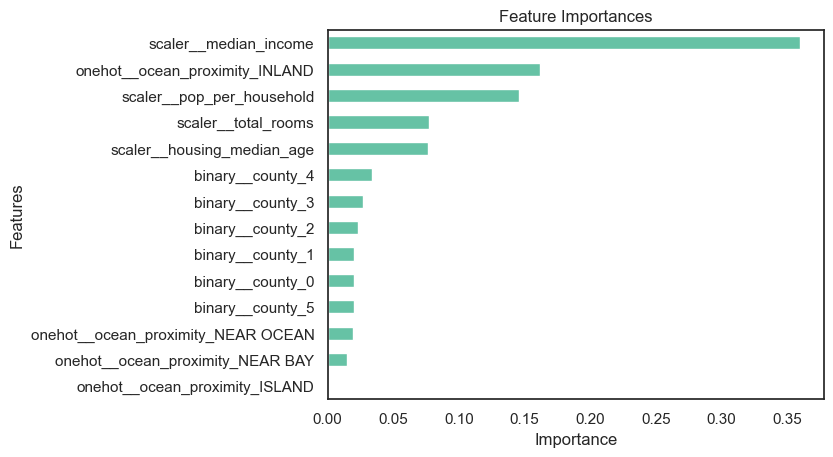

In [84]:
# Access the feature importances
feature_importances = rf_tuning.named_steps['regressor'].feature_importances_

# Get the feature names
feature_names = transformer.get_feature_names_out()

# Create a Series for feature importances
feature_imp = pd.Series(feature_importances, index=feature_names).sort_values(ascending=True)

# Plot the feature importances
feature_imp.plot(kind='barh', title='Feature Importances');
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The feature importance plot highlights the relative contribution of each feature to the **Random Forest** model’s predictions. Among the features, `scaler_median_income` stands out as the most significant predictor, indicating a strong relationship between median income and house prices. This is followed by `onehot_ocean_proximity_INLAND` and `scaler_pop_per_household`, which also play a notable role in predicting house prices. Features like `scaler_total_rooms` and `scaler_housing_median_age` show moderate importance, while binary-encoded county variables and other one-hot encoded categories, such as NEAR OCEAN and NEAR BAY, contribute less.

#### **Shapely Value of Explanations (SHAP)**

100%|===================| 10820/10821 [52:26<00:00]        

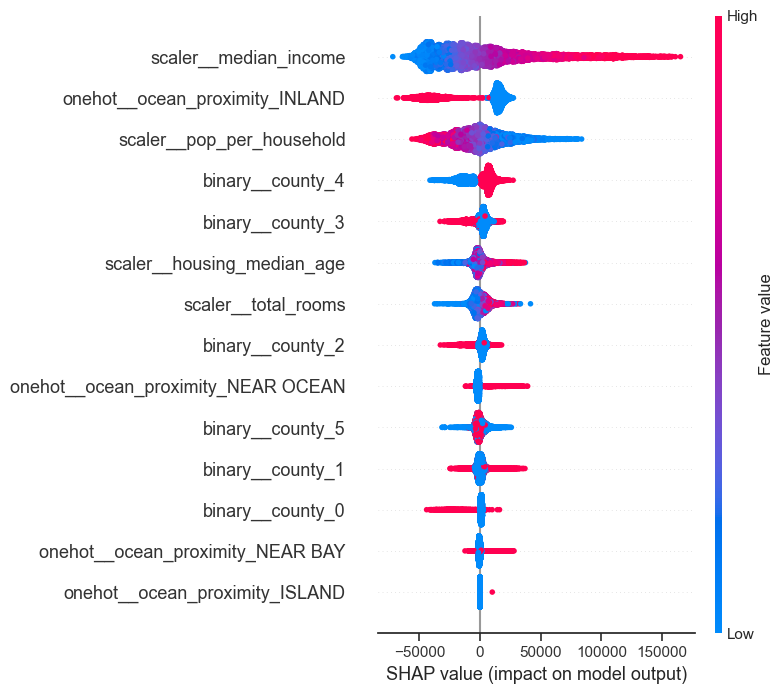

In [ ]:
# Access RF tuned model from the pipeline
rf_model = rf_tuning.named_steps['regressor']

# Transform X_train
X_train_transformed = pd.DataFrame(
    transformer.transform(X_train),  
    columns=transformer.get_feature_names_out(),  
    index=X_train.index  
)

# Define the SHAP TreeExplainer
explainer = shap.TreeExplainer(
    rf_model,
    data= X_train_transformed
)

# Calculate SHAP values for the transformed data
shap_values = explainer.shap_values(X_train_transformed, check_additivity=False)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

#### **Business Insights**

1.&emsp;**Economic Factor**
<br>The economic factor, represented by `scaler__median_income`, is the most influential predictor in the model. Higher income levels (highlighted in red) have a strong positive impact on house prices, significantly increasing predictions, while lower income levels (blue) negatively influence prices.

2.&emsp;**Geographic Factor**
<br>Geographic factors play a diverse role in house price predictions. For example, for `onehot__ocean_proximity_INLAND`, being categorized as "INLAND" has a significant negative impact on house prices, as seen by the SHAP values skewed toward negative. Similarly, ounty-related variables such as `binary__county_4` and `binary__county_3` indicate that regional factors are critical determinants of house prices. On the other hand, features like `onehot__ocean_proximity_NEAR_BAY` and `onehot__ocean_proximity_ISLAND` have minimal impact, with SHAP values clustering near zero, suggesting limited influence on predictions.

3.&emsp;**Demographic Factor**
<br>The demographic factor `scaler__pop_per_household` displays a wide range of SHAP values, indicating its influence is context-dependent and varies based on interactions with other features.

4.&emsp;**Property Characteristics Factor**
<br>Property characteristics such as `scaler__housing_median_age` and `scaler__total_rooms`have a moderate impact on the model’s predictions. Changes in these features lead to noticeable but less significant shifts in predicted house prices compared to economic and geographic factors.

## **8. Conclusion**

- From the six machine learning models tested, the process was narrowed down to three top-performing models, ultimately identifying **Random Forest** as the best model for predicting California house prices. The model achieved an R² of **0.7521**, RMSE of **47,546.94**, MAE of **33,369**, and MAPE of **20.30%**, showcasing its accuracy and reliability in price estimation.
- The analysis highlighted the importance of a comprehensive approach, including data cleaning, EDA, and data preprocessing, to ensure data quality and usability. Additionally, hyperparameter tuning played a critical role in significantly improving the model’s performance, underlining its necessity in building effective predictive models.
- Among the 13 features analyzed, **median income** emerged as the most significant factor influencing housing prices. This finding highlights the dominant role of *economic*, *demographic*, and *geographical* factors in driving housing values. This insight is crucial for stakeholders focusing on market dynamics and investment strategies.

## **9. Recommendation**

#### **When the Model is Reliable and Less Reliable**

**Reliable Use:**

- The model is most reliable when predicting house prices within the range of the training data, particularly for median income, which was identified as the strongest determinant of housing prices.
- t is suitable for analyzing trends and making predictions for neighborhoods or regions with similar economic and demographic conditions as those represented in the dataset.
- Predictions for areas with higher income levels (median_income) and inland properties (ocean_proximity) are relatively robust due to their significant impact on the model’s predictions.

**Less Reliable Usage:**
- The model is less reliable when applied to out-of-scope scenarios, such as predicting housing prices in regions with drastically different economic, geographic, or demographic characteristics from California (e.g., other states or countries).
- Predictions for properties located on islands or close to the bay are less dependable because these categories have minimal representation in the dataset, leading to potential bias or underfitting for these specific cases.
- It may perform poorly in extreme market conditions or with data significantly different from the 1990 dataset used, as the model does not account for recent economic trends, inflation, or changes in housing policies.

#### **Recommendations for Future Improvements**

**Data Improvements:**

- Use a more recent dataset to reflect current housing trends, accounting for modern economic conditions and housing demands.
- Include additional property characteristics features such as the property sizes, infrastructure, etc.
- Address the imbalances in categories (e.g., ISLAND) by collecting additional data for underrepresented classes to ensure more robust predictions.

**Model Improvements:**
- Experiment with ensemble techniques, such as combining multiple models (e.g., Random Forest + XGBoost), to improve performance.
- Explore more complex models, such as Neural Networks, to capture non-linear relationships and enhance predictions.

## **10. Save Model**

In [ ]:
# Save a compressed model
joblib.dump(rf_tuning, 'california_house_model.pkl', compress=9)